# 🌍 Étude de marché internationale – Analyse exploratoire (Notebook 2)

Ce notebook fait suite à la première étape de traitement des données, réalisée dans un premier fichier (nettoyage, harmonisation des pays, gestion des valeurs manquantes, calculs correctifs, ajout de variables construites…).

**Objectif de ce notebook :** explorer les relations entre les variables pour identifier des groupes de pays similaires, en vue de proposer des recommandations de ciblage à l’entreprise "La Poule qui Chante".

---

## 🔗 Sommaire

- [1. Import du jeu de données nettoyé](#1-import-du-jeu-de-données-nettoyé)
- [2. Analyse exploratoire (EDA)](#2-analyse-exploratoire-eda)
  - [2.1. Statistiques descriptives](#21-statistiques-descriptives)
  - [2.2. Matrice de corrélation](#22-matrice-de-corrélation)
  - [2.3. Analyse en composantes principales (ACP)](#23-analyse-en-composantes-principales-acp)
  - [2.4. Détection de groupes (Clustering)](#24-détection-de-groupes-clustering)

## 1. 📥 Import du jeu de données nettoyé

In [3]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement du fichier nettoyé issu du premier notebook
df = pd.read_csv("df_final.csv")

# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Aperçu des premières lignes
df.head()

,Pays,conso_volaille_kg_hab,prod_volaille_milliers_tonnes,import_volaille_milliers_tonnes,export_volaille_milliers_tonnes,dispo_volaille_milliers_tonnes,variation_stock_milliers_tonnes,Population_milliers,PIB_hab_USD,Population_urbaine_%,Stabilite_politique,PIB_total_milliards_USD,autosuffisance_volaille,Population_urbaine_millions
0,Afghanistan,1.53,28.0,29.0,0.0,57.0,0.0,36296.113,525.469771,25.250,-2.794976,19.072510,0.491228,9.164769
1,Afrique du Sud,35.69,1667.0,514.0,63.0,2118.0,-0.0,57009.756,6618.335083,65.850,-0.284804,377.309668,0.787063,37.540924
2,Albanie,16.36,13.0,38.0,0.0,47.0,4.0,2884.169,4614.047969,59.383,0.373771,13.307694,0.276596,1.712706
3,Algérie,6.38,275.0,2.0,0.0,277.0,0.0,41389.189,4554.667540,72.052,-0.919614,188.513996,0.992780,29.821738
4,Allemagne,19.47,1514.0,842.0,646.0,1739.0,-29.0,82658.409,45526.599958,77.261,0.574381,3763.156320,0.870615,63.862713


## 2. Analyse exploratoire (EDA)

### 2.1. Statistiques descriptives

Dans cette première étape de l'exploration, nous allons observer les grandes tendances des données disponibles : moyennes, médianes, valeurs extrêmes, distribution générale, etc.

Cela permettra d’identifier :
- les variables les plus dispersées,
- les éventuels effets de seuil ou valeurs atypiques,
- la nécessité éventuelle d’un traitement complémentaire (normalisation, transformation…).

---

In [5]:
# Dimensions du jeu de données
print(f"Nombre de pays : {df.shape[0]}")
print(f"Nombre de variables : {df.shape[1]}")

# Statistiques descriptives générales
df.describe().T

Nombre de pays : 163
Nombre de variables : 14


,count,mean,std,min,25%,50%,75%,max
conso_volaille_kg_hab,163.0,20.285092,15.840069,0.130000,6.760000,18.200000,29.640000,7.231000e+01
prod_volaille_milliers_tonnes,163.0,739.478528,2537.859578,0.000000,14.500000,71.000000,376.500000,2.191400e+04
import_volaille_milliers_tonnes,163.0,91.993865,189.949717,0.000000,3.000000,16.000000,83.000000,1.069000e+03
export_volaille_milliers_tonnes,163.0,110.331288,469.780196,0.000000,0.000000,2.000000,20.000000,4.223000e+03
dispo_volaille_milliers_tonnes,163.0,707.950920,2230.715358,2.000000,32.500000,108.000000,364.500000,1.826600e+04
variation_stock_milliers_tonnes,163.0,14.061350,76.705360,-119.000000,-0.000000,0.000000,7.500000,8.590000e+02
Population_milliers,163.0,44474.652607,157064.294173,52.045000,2932.819500,9785.843000,31274.472000,1.421022e+06
PIB_hab_USD,163.0,14302.096616,19537.802878,432.324026,1957.201993,6049.521286,17612.085824,1.101932e+05
Population_urbaine_%,163.0,58.719325,22.279453,16.350000,41.367000,58.299000,77.119000,1.000000e+02
Stabilite_politique,163.0,-0.066861,0.899597,-2.934317,-0.627854,-0.002855,0.640441,1.561946e+00


In [6]:
# Nombre de modalités différentes par variable (pour détecter des constantes ou des faibles variations)
df.nunique().sort_values()

export_volaille_milliers_tonnes     53
variation_stock_milliers_tonnes     55
import_volaille_milliers_tonnes     83
prod_volaille_milliers_tonnes      122
dispo_volaille_milliers_tonnes     131
autosuffisance_volaille            143
conso_volaille_kg_hab              160
Population_urbaine_%               161
Pays                               163
Population_milliers                163
PIB_hab_USD                        163
Stabilite_politique                163
PIB_total_milliards_USD            163
Population_urbaine_millions        163
dtype: int64

### 2.2. Visualisation des distributions

Dans cette partie, on visualise la distribution des variables continues à l’aide :
- d’histogrammes pour observer la forme de la distribution,
- de boxplots pour repérer les valeurs extrêmes.

Cela permet d'anticiper les ajustements nécessaires pour la suite (transformation, normalisation, détection d'outliers…).

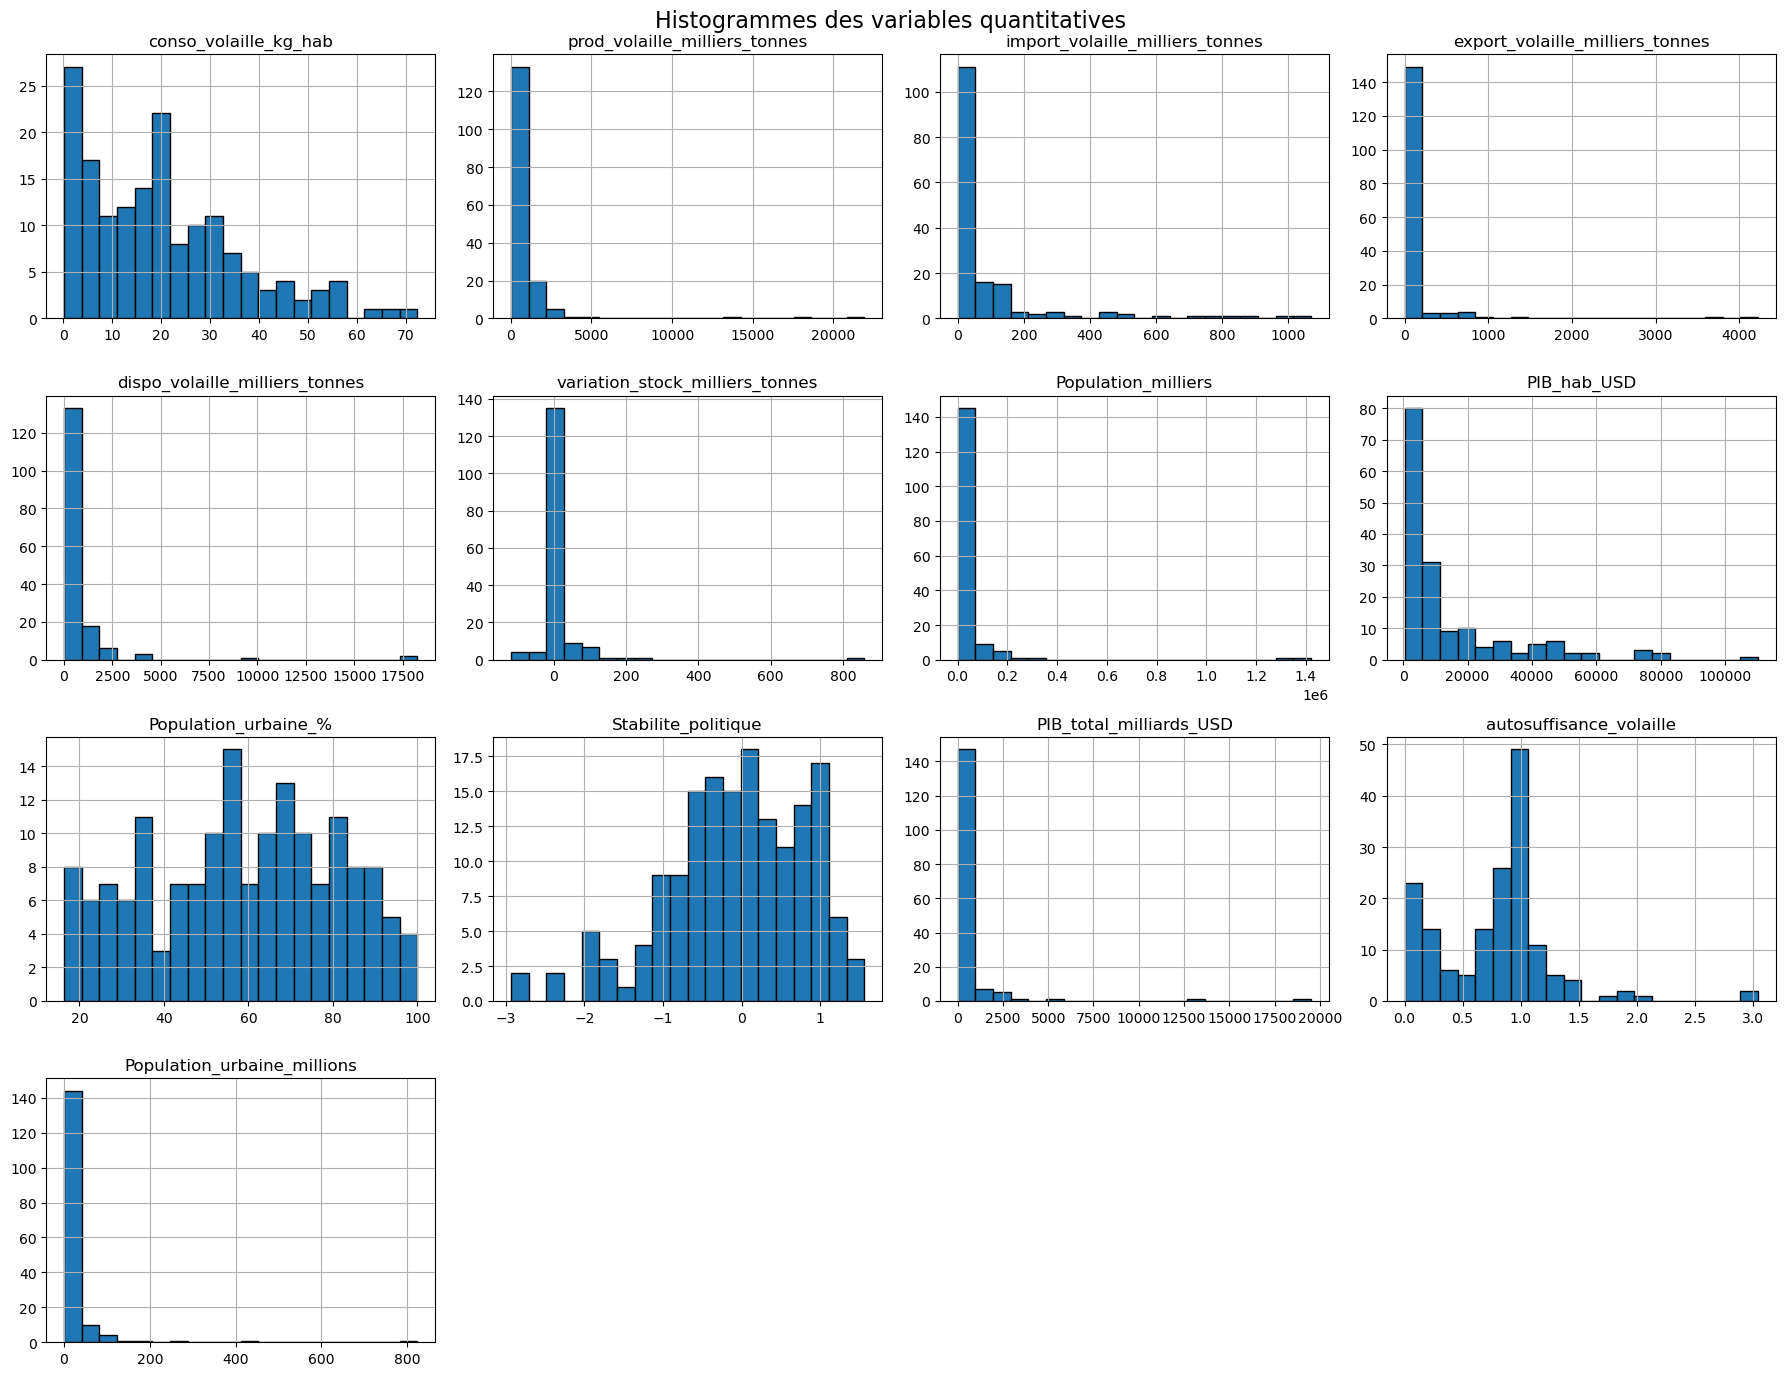

In [8]:
df.hist(figsize=(18, 14), bins=20, edgecolor='black')
plt.suptitle("Histogrammes des variables quantitatives", fontsize=16)
plt.tight_layout()
plt.show()

### 2.3. Boxplots des distributions

Pour compléter l’analyse des distributions, les boxplots permettent de visualiser :
- les médianes,
- l’étendue interquartile,
- la présence de valeurs atypiques (outliers).

Cela peut guider les choix de traitement en vue de l’ACP (standardisation, exclusions…).

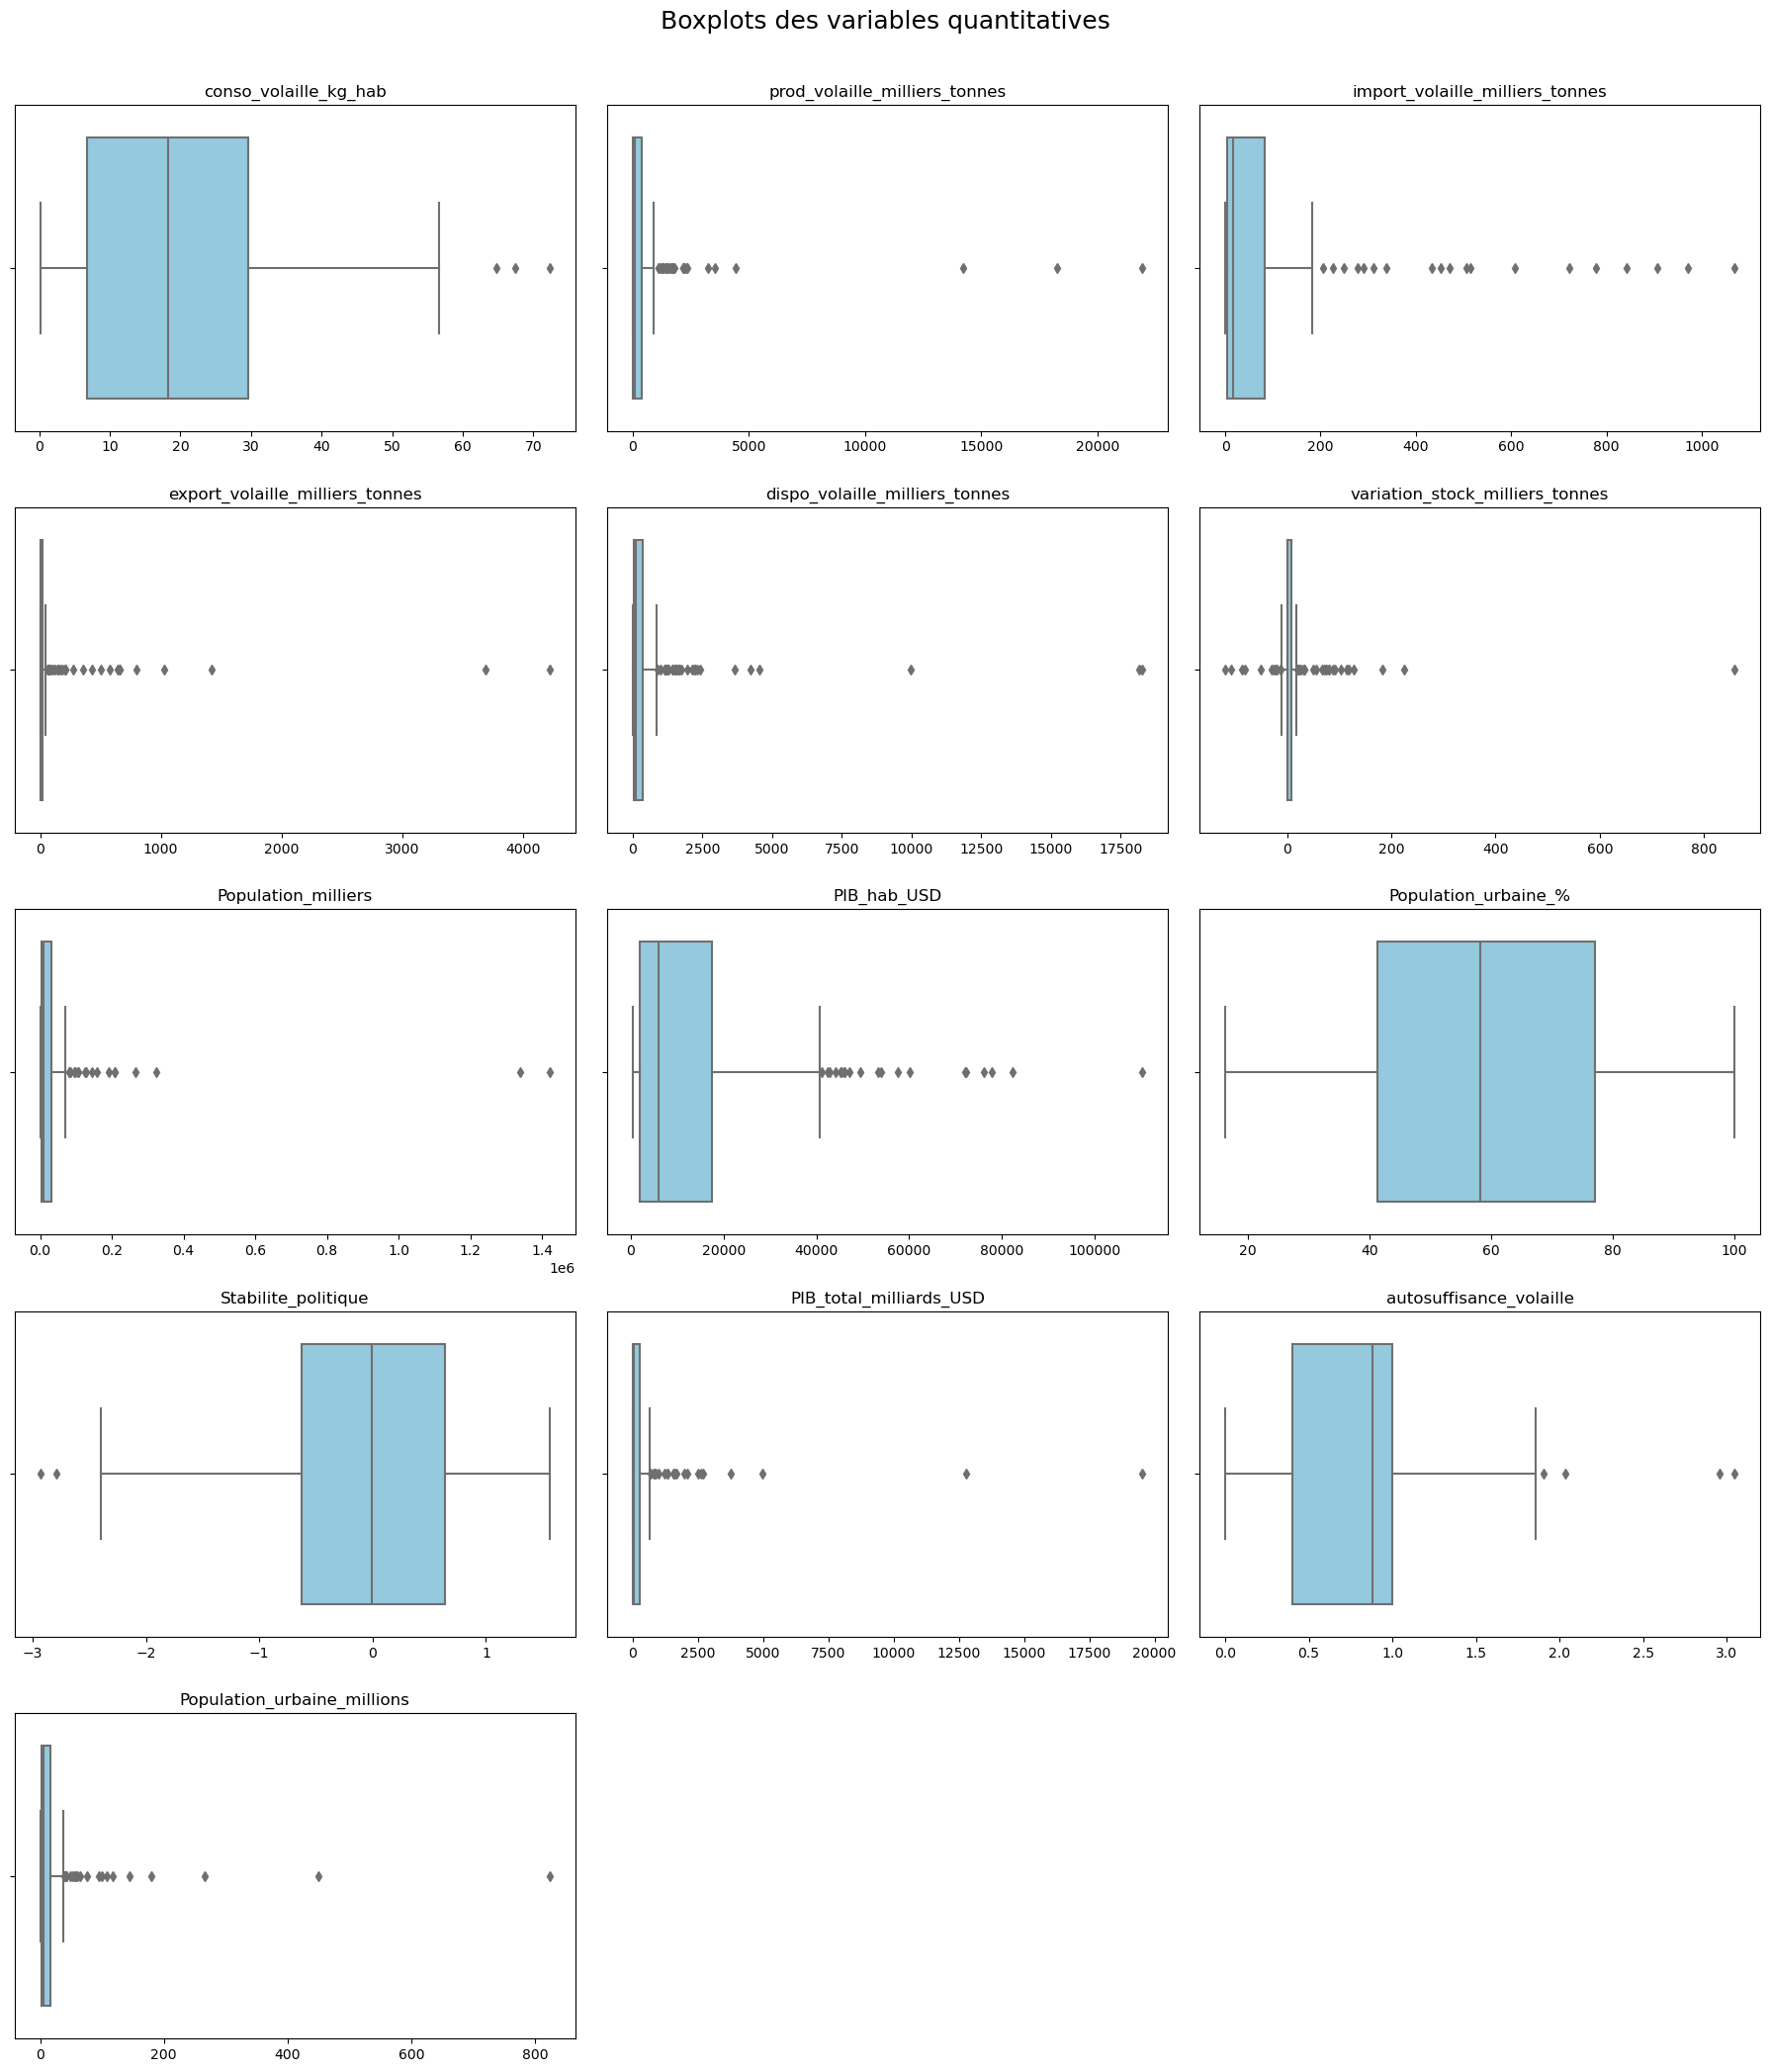

In [10]:
# Sélection des variables quantitatives (hors 'Pays')
variables_quantitatives = df.select_dtypes(include='number').columns

# Création des boxplots
plt.figure(figsize=(18, 22))
for i, col in enumerate(variables_quantitatives, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Boxplots des variables quantitatives", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

L’analyse combinée des **boxplots** et des **histogrammes** permet d’identifier les tendances générales, les valeurs extrêmes, ainsi que d’éventuels besoins en transformation des données pour les étapes d’ACP ou de clustering.

#### 🧠 Observations principales :

- **📌 Présence de valeurs extrêmes** dans plusieurs variables :
  - `prod_volaille_milliers_tonnes`, `export_volaille_milliers_tonnes`, `Population_milliers`, `PIB_total_milliards_USD`, `Population_urbaine_millions`
  - Ces outliers devront être pris en compte dans les étapes ultérieures (standardisation, détection de points atypiques).

- **📉 Distributions fortement asymétriques à droite** (longue traîne de valeurs élevées) :
  - `PIB_hab_USD`, `dispo_volaille_milliers_tonnes`, `Population_milliers`
  - Un traitement type **log-transformation** ou une **standardisation** est envisageable avant ACP/K-means.

- **📊 Variables avec une meilleure homogénéité** :
  - `conso_volaille_kg_hab` présente une distribution plus régulière.
  - `Stabilite_politique` est à peu près centrée, mais avec des cas extrêmes.
  - `Population_urbaine_%` semble **bimodale**, suggérant deux types de pays (très urbanisés vs faiblement urbanisés).

#### 🎯 Conséquences pour la suite :

- 👉 Standardisation indispensable avant ACP / clustering.
- 👉 Certaines variables comme `Population`, `PIB`, `export`, etc. pourraient bénéficier d’une transformation logarithmique.
- 👉 La détection d’outliers devra être surveillée, notamment dans l’étape de clustering (KMeans, dendrogramme…).

## 2.4. Analyse en composantes principales (ACP)

L'objectif de cette étape est de réduire la dimensionnalité du jeu de données tout en conservant un maximum d'information.

L'ACP permet notamment :
- d'identifier les axes de plus forte variance entre les pays,
- de visualiser les pays dans un espace à 2 ou 3 dimensions,
- de préparer efficacement une segmentation (clustering) sur des données débruitées.

⚠️ L'ACP nécessite que les variables soient **standardisées**, car elle est sensible aux différences d'échelle entre les colonnes.

In [13]:
# Vérification des doublons exacts de nom de pays
df['Pays'].value_counts()[df['Pays'].value_counts() > 1]

Series([], Name: count, dtype: int64)

In [14]:
# Affiche uniquement les pays apparaissant plus d'une fois
df['Pays'].value_counts()[df['Pays'].value_counts() > 1]

Series([], Name: count, dtype: int64)

In [15]:
# Recherche tous les pays contenant une variation autour de "Chine"
df[df['Pays'].str.contains("Chine|China|Taiwan|Macao|Hong|Kong", case=False, na=False)]

,Pays,conso_volaille_kg_hab,prod_volaille_milliers_tonnes,import_volaille_milliers_tonnes,export_volaille_milliers_tonnes,dispo_volaille_milliers_tonnes,variation_stock_milliers_tonnes,Population_milliers,PIB_hab_USD,Population_urbaine_%,Stabilite_politique,PIB_total_milliards_USD,autosuffisance_volaille,Population_urbaine_millions
31,"Chine, RAS de Hong Kong",53.51,24.0,907.0,663.0,280.0,-12.0,7306.322,46160.429791,100.000,0.818204,337.262964,0.085714,7.306322
32,"Région administrative spéciale de Macao, Chine",34.47,3.0,23.0,0.0,19.0,8.0,622.585,77704.921531,100.000,1.407130,48.377919,0.157895,0.622585
33,Chine,12.33,18236.0,452.0,576.0,18161.0,-50.0,1421021.791,8979.676527,57.960,-0.232558,12760.316021,1.004130,823.624230
68,Hongrie,25.27,493.0,58.0,210.0,266.0,74.0,9729.823,14736.166816,71.062,0.796201,143.380295,1.853383,6.914207


In [16]:
# Supprimer uniquement les doublons précis autour de la Chine
noms_a_supprimer = [
    "Chine, RAS de Hong Kong",
    "Région administrative spéciale de Macao, Chine"
]

df = df[~df['Pays'].isin(noms_a_supprimer)]

# Vérifier que seule "Chine" reste
df[df['Pays'].str.contains("Chine|China", case=False, na=False)]

,Pays,conso_volaille_kg_hab,prod_volaille_milliers_tonnes,import_volaille_milliers_tonnes,export_volaille_milliers_tonnes,dispo_volaille_milliers_tonnes,variation_stock_milliers_tonnes,Population_milliers,PIB_hab_USD,Population_urbaine_%,Stabilite_politique,PIB_total_milliards_USD,autosuffisance_volaille,Population_urbaine_millions
33,Chine,12.33,18236.0,452.0,576.0,18161.0,-50.0,1421021.791,8979.676527,57.96,-0.232558,12760.316021,1.00413,823.62423


In [17]:
df.set_index("Pays", inplace=True)

In [18]:
df.head()

,conso_volaille_kg_hab,prod_volaille_milliers_tonnes,import_volaille_milliers_tonnes,export_volaille_milliers_tonnes,dispo_volaille_milliers_tonnes,variation_stock_milliers_tonnes,Population_milliers,PIB_hab_USD,Population_urbaine_%,Stabilite_politique,PIB_total_milliards_USD,autosuffisance_volaille,Population_urbaine_millions
Pays,,,,,,,,,,,,,
Afghanistan,1.53,28.0,29.0,0.0,57.0,0.0,36296.113,525.469771,25.250,-2.794976,19.072510,0.491228,9.164769
Afrique du Sud,35.69,1667.0,514.0,63.0,2118.0,-0.0,57009.756,6618.335083,65.850,-0.284804,377.309668,0.787063,37.540924
Albanie,16.36,13.0,38.0,0.0,47.0,4.0,2884.169,4614.047969,59.383,0.373771,13.307694,0.276596,1.712706
Algérie,6.38,275.0,2.0,0.0,277.0,0.0,41389.189,4554.667540,72.052,-0.919614,188.513996,0.992780,29.821738
Allemagne,19.47,1514.0,842.0,646.0,1739.0,-29.0,82658.409,45526.599958,77.261,0.574381,3763.156320,0.870615,63.862713


In [19]:
# 1. Sélection des variables numériques à inclure dans l'ACP (hors 'Pays')
X = df
names = df.index
nom_variable = df.columns


In [20]:
# 2. Standardisation des variables
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 3. Application de l'ACP
pca = decomposition.PCA(n_components=13)
pca.fit(X_scaled)


PCA(n_components=13)

In [21]:
#Variance 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_.cumsum())

[4.89857142e+00 2.53945917e+00 1.22896005e+00 1.12856160e+00
 8.99157410e-01 7.32298553e-01 5.70264236e-01 4.62536440e-01
 3.45919968e-01 2.02264440e-01 6.38476189e-02 9.40644307e-03
 2.66247147e-06]
[0.37447273 0.56860243 0.66255065 0.74882387 0.81756022 0.873541
 0.91713502 0.95249375 0.9789377  0.99439987 0.99928072 0.9999998
 1.        ]


In [22]:
# Je crée une df qui affiche la variance expliquée pour chaque dimension.
variance = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(13)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
variance

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,4.898571,37.0,37.0
1,Dim2,2.539459,19.0,57.0
2,Dim3,1.228960,9.0,66.0
3,Dim4,1.128562,9.0,75.0
4,Dim5,0.899157,7.0,82.0
5,Dim6,0.732299,6.0,87.0
6,Dim7,0.570264,4.0,92.0
7,Dim8,0.462536,4.0,95.0
8,Dim9,0.345920,3.0,98.0
9,Dim10,0.202264,2.0,99.0


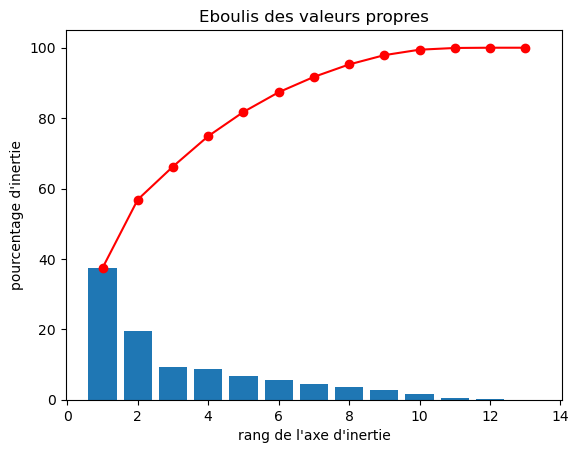

In [23]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
    
display_scree_plot(pca)

In [24]:
# Calcul des composantes principales
n_comp = 4
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=4)

In [25]:
# Fonction qui me permet d'afficher mes cercles de corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:],
                   angles='xy', scale_units='xy', scale=1, color="orange")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
           
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
           
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
       
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

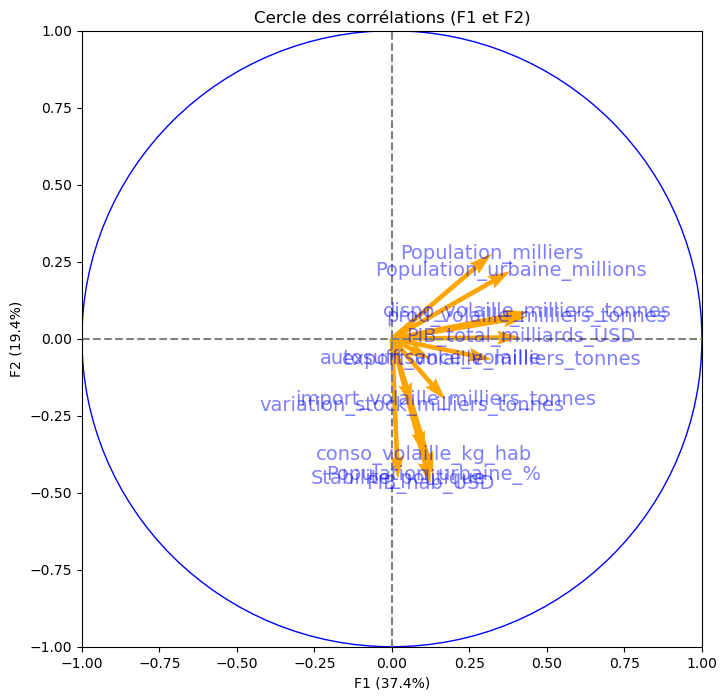

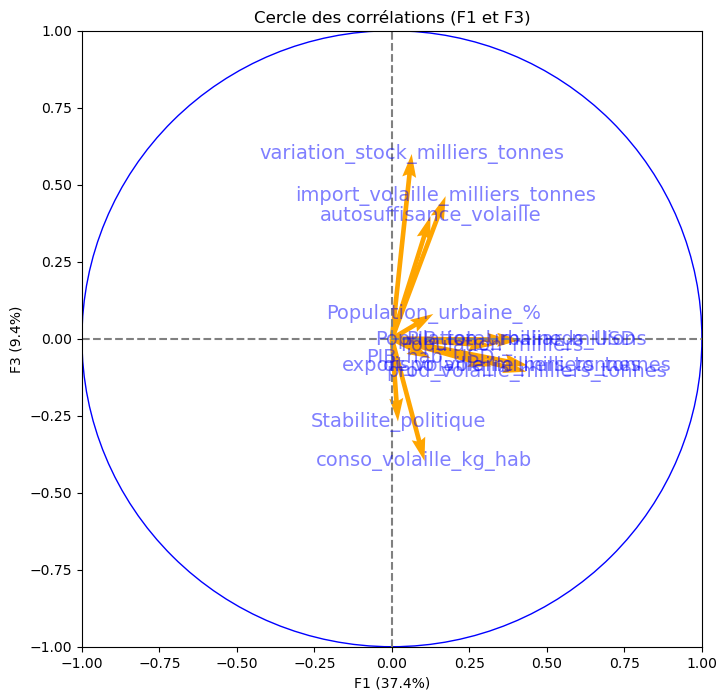

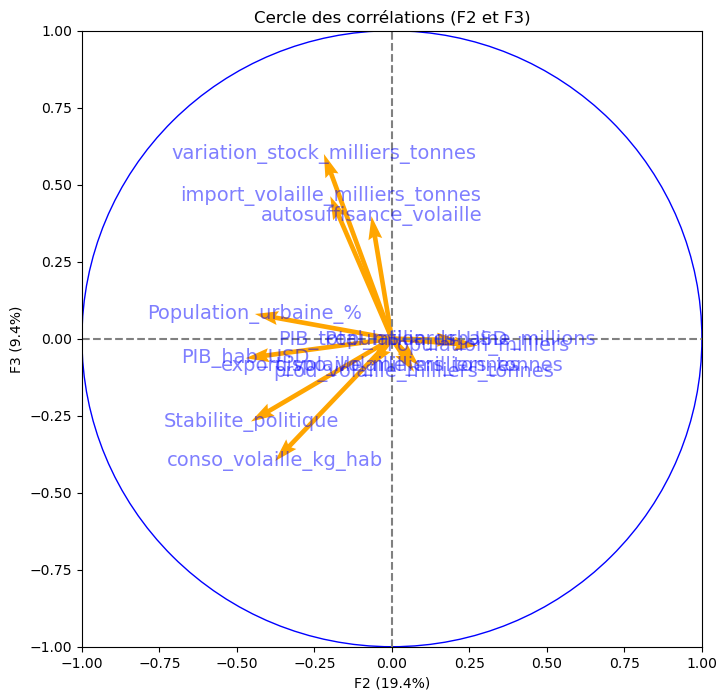

In [26]:
pcs = pca.components_
display_circles(pcs,n_comp , pca, [(0,1),(0,2),(1,2)], labels = np.array(nom_variable))

In [27]:
# Fonction qui permet de projeter les individus sur les dimensions
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure      
            fig = plt.figure(figsize=(8,8))
       
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center')
               
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
       
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

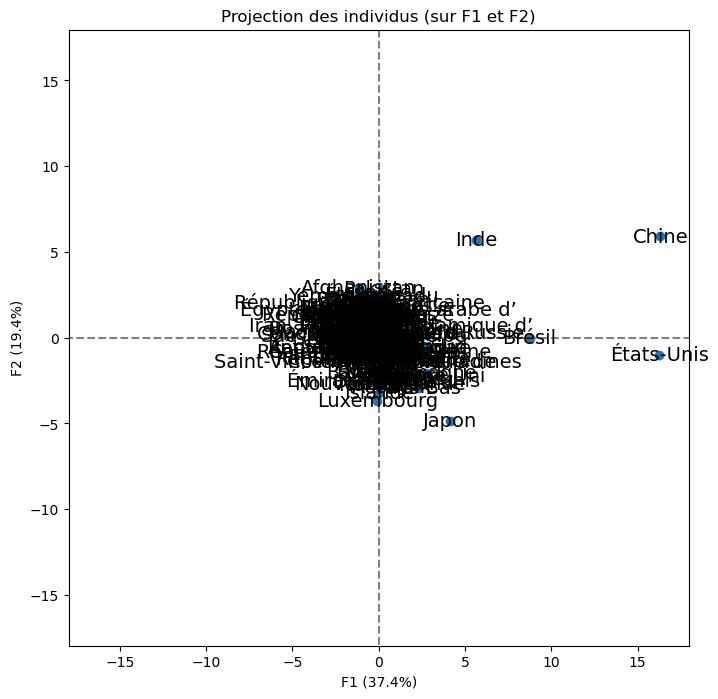

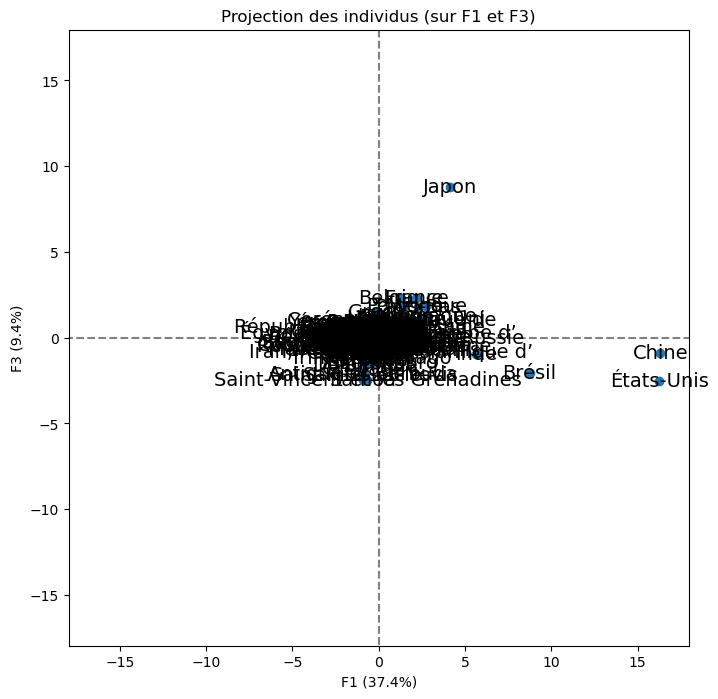

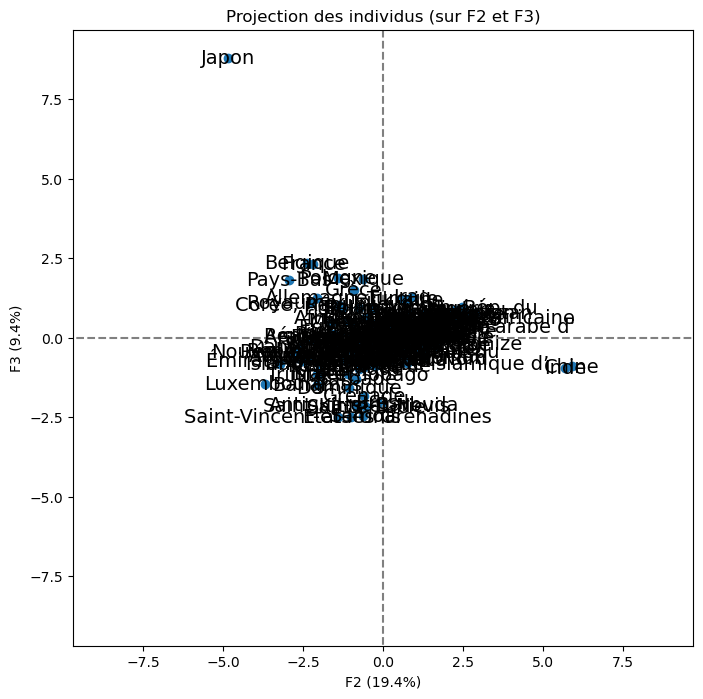

<Figure size 640x480 with 0 Axes>

In [28]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(0,2),(1,2)], labels = np.array(names))
plt.figure()
plt.show()

In [29]:
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Tunisie', 'Turkménistan', 'Turquie', 'Ukraine', 'Uruguay', 'Vanuatu',
       'Viet Nam', 'Yémen, Rép. du', 'Zambie', 'Zimbabwe'],
      dtype='object', name='Pays', length=161)

### 2.4. Suppression des outliers pour une ACP plus lisible

D’après les résultats de l’ACP (projection des individus), certains pays apparaissent comme des **valeurs atypiques** ou **outliers** (notamment : Chine, Inde, États-Unis, Brésil, Japon…).

Ces outliers peuvent avoir une influence excessive sur l’analyse en compressant les autres observations dans un nuage central difficile à lire.  
Nous allons donc :
- les **isoler dans un DataFrame `df_outliers`** pour les analyser plus tard si besoin,
- puis les **retirer du jeu de données principal** avant de refaire l’ACP.

Cette approche permet une analyse plus stable et plus interprétable pour la majorité des pays.

In [31]:
# Liste des pays considérés comme outliers après analyse
outliers = ['Chine', 'États-Unis', 'Inde', 'Brésil', 'Japon']

# Création d'un DataFrame avec uniquement les outliers
df_outliers = df[df.index.isin(outliers)].copy()

# Suppression des outliers du DataFrame principal
df_sans_outliers = df[~df.index.isin(outliers)].copy()

# Vérification
print(f"{len(df_outliers)} pays outliers isolés.")
print(f"{len(df)} pays au départ -> {len(df_sans_outliers)} pays restants après suppression.")

5 pays outliers isolés.
161 pays au départ -> 156 pays restants après suppression.


### Avant de refaire l'ACP, je vérifie ques mes variables ne soient pas trop corrélées grâce à une matrice de corrélation


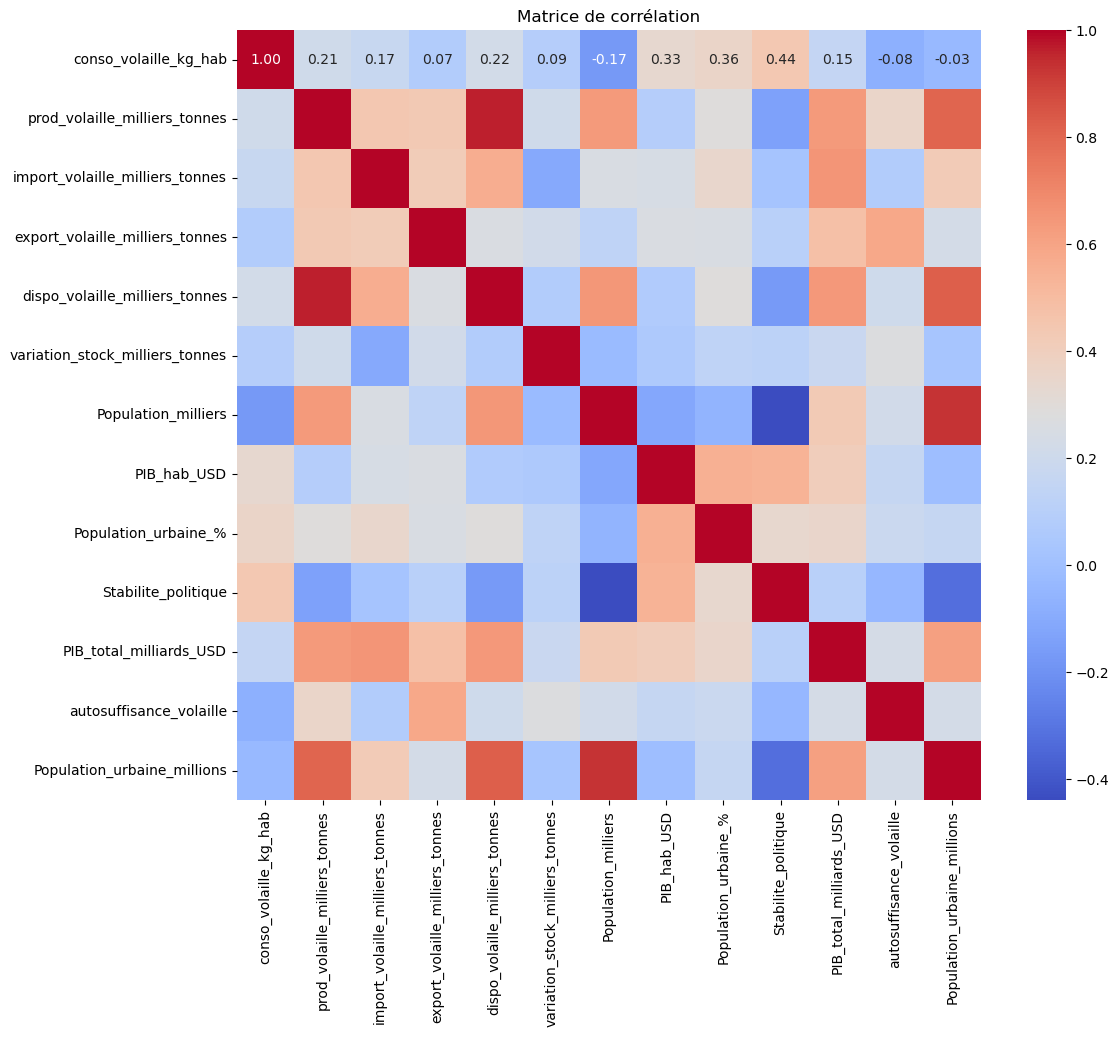

In [33]:
## Matrice de corrélation

plt.figure(figsize=(12, 10))
sns.heatmap(df_sans_outliers.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

> Il semble que population_urbaine_millions soit très fortement corrélée avec population_milliers et prod_volaille avec dispo_vollaille.

>Je vais donc les exclure prod_volaille_milliers_tonnes et Population_urbaine_millions pour améliorer mes résultats.

In [35]:
df_sans_outliers = df_sans_outliers.drop(columns=['prod_volaille_milliers_tonnes','Population_urbaine_millions'])

df_sans_outliers.head(100)

,conso_volaille_kg_hab,import_volaille_milliers_tonnes,export_volaille_milliers_tonnes,dispo_volaille_milliers_tonnes,variation_stock_milliers_tonnes,Population_milliers,PIB_hab_USD,Population_urbaine_%,Stabilite_politique,PIB_total_milliards_USD,autosuffisance_volaille
Pays,,,,,,,,,,,
Afghanistan,1.53,29.0,0.0,57.0,0.0,36296.113,525.469771,25.250,-2.794976,19.072510,0.491228
Afrique du Sud,35.69,514.0,63.0,2118.0,-0.0,57009.756,6618.335083,65.850,-0.284804,377.309668,0.787063
Albanie,16.36,38.0,0.0,47.0,4.0,2884.169,4614.047969,59.383,0.373771,13.307694,0.276596
Algérie,6.38,2.0,0.0,277.0,0.0,41389.189,4554.667540,72.052,-0.919614,188.513996,0.992780
Allemagne,19.47,842.0,646.0,1739.0,-29.0,82658.409,45526.599958,77.261,0.574381,3763.156320,0.870615
...,...,...,...,...,...,...,...,...,...,...,...
Mongolie,2.77,10.0,2.0,9.0,1.0,3113.786,3645.967087,68.363,0.783372,11.352761,0.000000
Monténégro,15.98,8.0,0.0,10.0,1.0,627.563,7758.369220,66.477,-0.062577,4.868865,0.400000
Mozambique,3.59,24.0,0.0,116.0,-1.0,28649.018,470.938563,35.455,-0.918099,13.491927,0.793103


In [36]:
# Sélection des variables à inclure dans l'ACP
X = df_sans_outliers
names = df_sans_outliers.index
nom_variable = df_sans_outliers.columns

# Standardisation
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [37]:
# on refait l'ACP

pca = decomposition.PCA(n_components=11)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

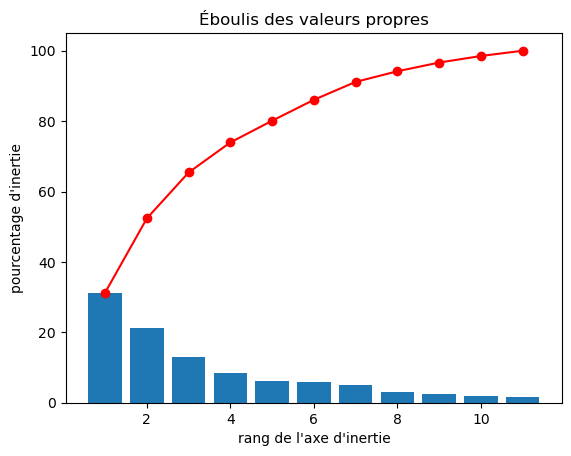

In [38]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_ * 100
    plt.bar(np.arange(len(scree)) + 1, scree)
    plt.plot(np.arange(len(scree)) + 1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Éboulis des valeurs propres")
    plt.show()

display_scree_plot(pca)

#### 🎯 Objectif de cette visualisation

Ce graphique, appelé **scree plot** ou **éboulis des valeurs propres**, permet de visualiser la part de variance expliquée par chaque axe principal (ou composante) issu de l'ACP. Il est essentiel pour **choisir le nombre de dimensions à conserver** tout en limitant la perte d'information.

---

#### 📈 Lecture du graphique

- L'axe horizontal représente le **rang de chaque composante principale** (PC1, PC2, PC3, etc.).
- L'axe vertical indique le **pourcentage de variance expliquée** par chaque composante (barres bleues).
- La ligne rouge montre la **variance cumulée** (somme progressive des barres).

---

#### 🧠 Mon interprétation

Je remarque que :
- Les **deux premières composantes** expliquent **plus de 60 % de la variance totale**, ce qui est déjà très informatif.
- À partir de la 4e ou 5e composante, **l’apport en information devient marginal** (les barres sont très petites).
- La courbe rouge **s’aplatit** fortement après la 4e ou 5e composante : c’est ce qu’on appelle le "coude", un critère visuel important.

---

#### ✅ Décision

Je décide de **conserver les 4 premières composantes principales**, ce qui me permet de :
- Réduire la dimensionnalité du jeu de données,
- Garder environ **85 à 90 % de l'information initiale**,
- Faciliter la visualisation (projection en 2D ou 3D),
- Optimiser les performances des algorithmes de clustering ensuite.

> Cette réduction est un bon compromis entre simplification et conservation d'information.

In [40]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):


    for d1, d2 in axis_ranks:
        if d2 >= n_comp:
            continue

        fig, ax = plt.subplots(figsize=(8, 8))
        if lims is not None:
            xmin, xmax, ymin, ymax = lims
        elif pcs.shape[1] < 30:
            xmin, xmax, ymin, ymax = -1, 1, -1, 1
        else:
            xmin, xmax, ymin, ymax = (
                min(pcs[d1, :]), max(pcs[d1, :]),
                min(pcs[d2, :]), max(pcs[d2, :])
            )

        # Flèches
        if pcs.shape[1] < 30:
            plt.quiver(
                np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                pcs[d1, :], pcs[d2, :], angles='xy', scale_units='xy', scale=1, color="orange"
            )
        else:
            lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
            ax.add_collection(LineCollection(lines, axes=ax, alpha=1, color='black'))

        # Noms des variables
        if labels is not None:
            for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                if xmin <= x <= xmax and ymin <= y <= ymax:
                    plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation)

        # Cercle
        circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
        plt.gca().add_artist(circle)
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
        plt.plot([-1, 1], [0, 0], color='grey', ls='--')
        plt.plot([0, 0], [-1, 1], color='grey', ls='--')
        plt.xlabel(f"F{d1+1} ({round(100*pca.explained_variance_ratio_[d1], 1)}%)")
        plt.ylabel(f"F{d2+1} ({round(100*pca.explained_variance_ratio_[d2], 1)}%)")
        plt.title(f"Cercle des corrélations (F{d1+1} et F{d2+1})")
        plt.show()


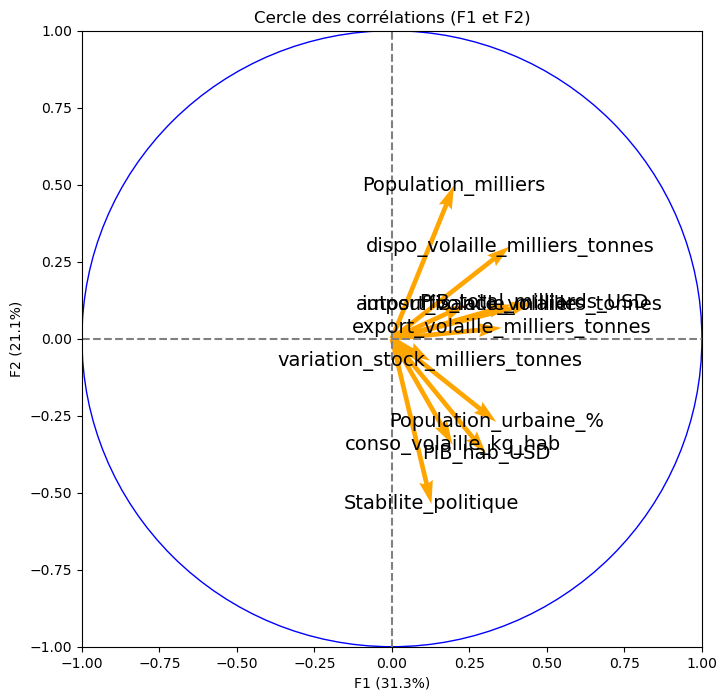

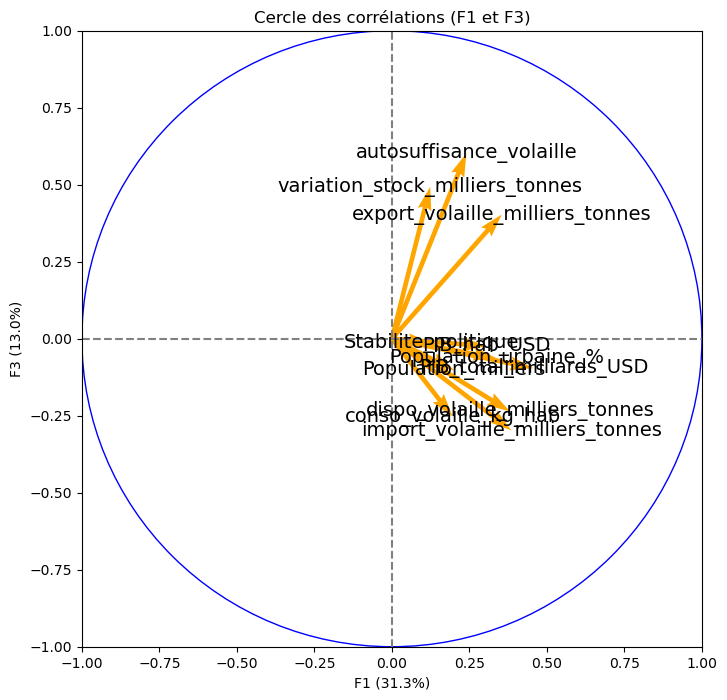

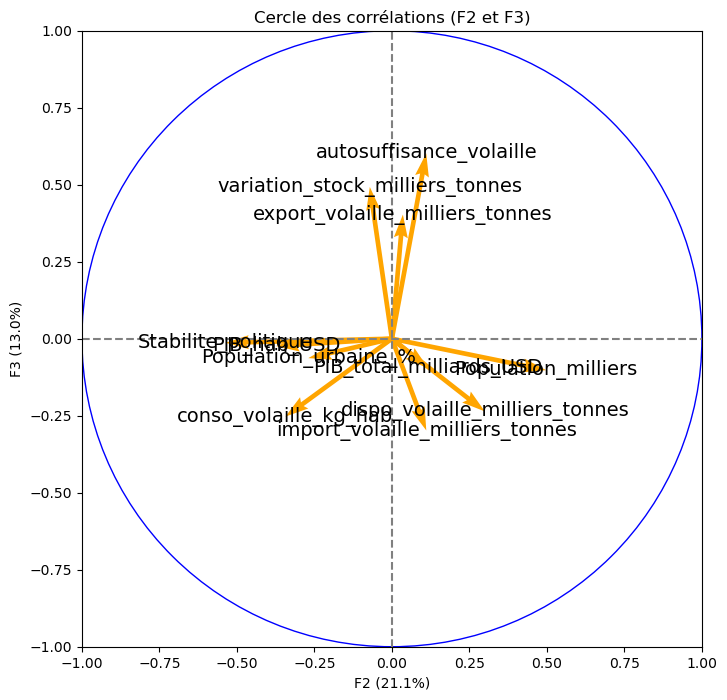

In [41]:

pcs = pca.components_
display_circles(pcs, n_comp=4, pca=pca, axis_ranks=[(0,1),(0,2),(1,2)], labels=np.array(nom_variable))

### 2.4.1 Cercle des corrélations – Composantes F1 et F2

Ce graphique permet d’interpréter les deux premières composantes principales (F1 et F2), qui expliquent ensemble **près de 60 % de la variance totale** (cf. scree plot).  
Il montre comment les variables initiales contribuent à la formation de ces axes.

**Lecture et interprétation :**

- Les flèches indiquent la contribution des variables aux composantes principales.
- Plus une flèche est longue et proche du cercle, plus la variable est **bien représentée** dans le plan F1-F2.
- Si deux variables pointent dans la même direction, elles sont **positivement corrélées**.
- Si elles sont opposées, elles sont **négativement corrélées**.
- Si elles sont perpendiculaires, elles sont **indépendantes**.

**Commentaires personnels :**

- Les variables liées à la **taille démographique** (Population_milliers, Population_urbaine_millions) sont bien représentées et fortement corrélées, orientées sur l’axe F1.
- Le **PIB_total_milliards_USD** et la **production de volaille** pointent également dans la même direction, ce qui semble logique : les pays avec un PIB élevé ont tendance à produire davantage.
- À l’inverse, la **stabilité politique** ou le **PIB/hab** sont moins bien projetés sur ce plan (flèches courtes), et pourraient être mieux représentés sur une autre combinaison de composantes (ex : F1/F3).
- Ce graphique m’aide à comprendre quels groupes de variables sont liés entre eux et quelles dimensions principales ils influencent le plus.

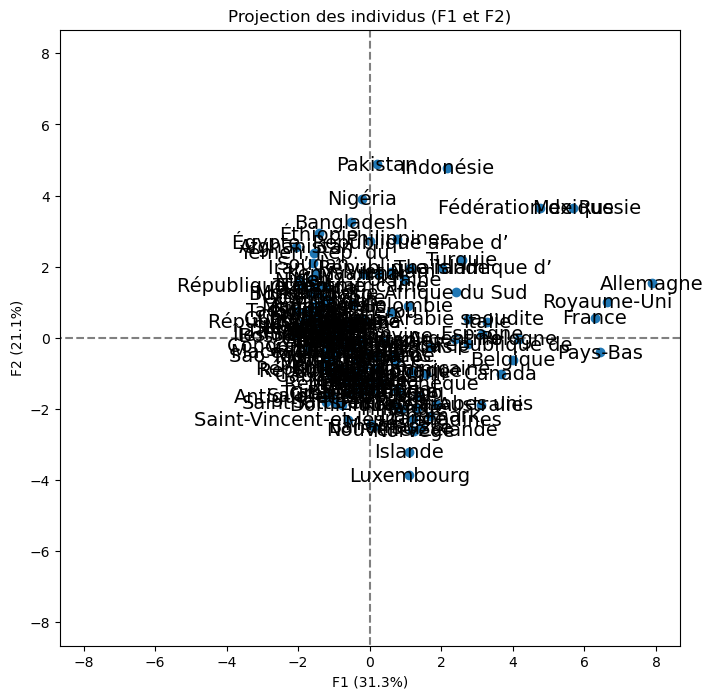

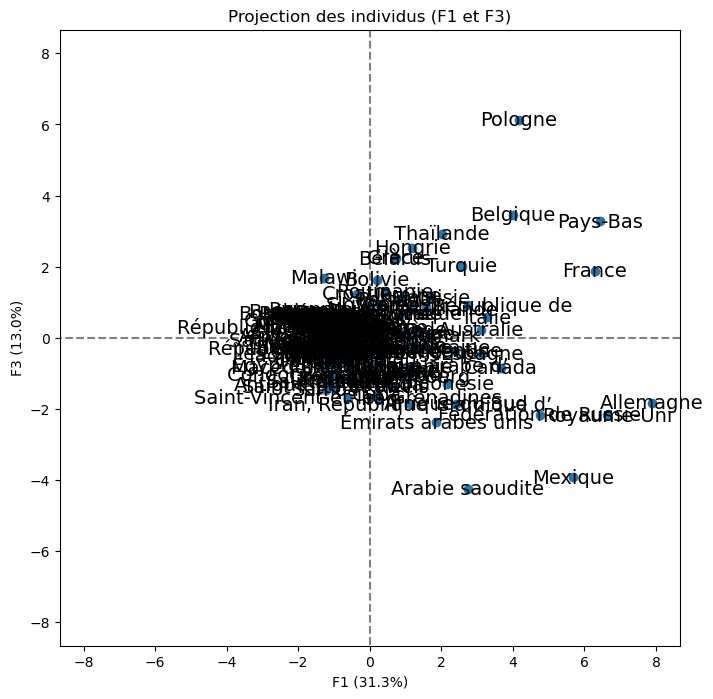

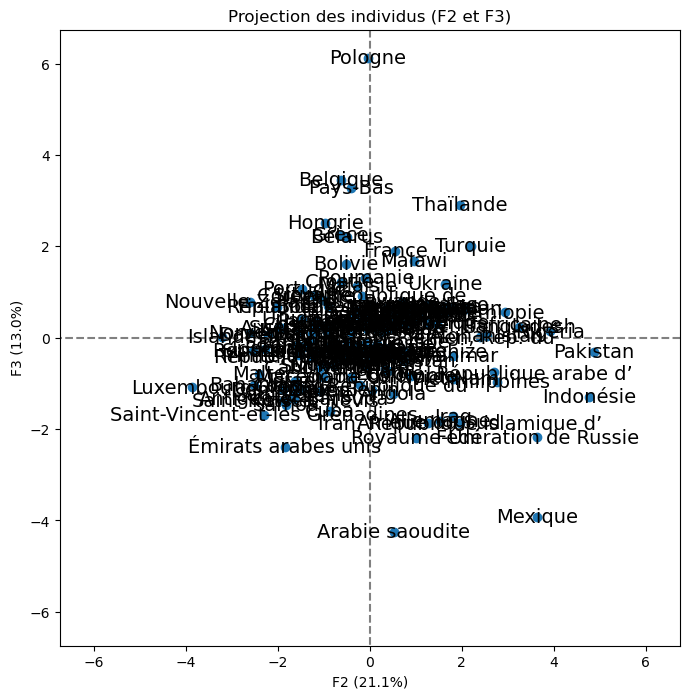

In [43]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1, d2 in axis_ranks:
        if d2 >= n_comp:
            continue
        fig = plt.figure(figsize=(8, 8))
        if illustrative_var is None:
            plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
        else:
            illustrative_var = np.array(illustrative_var)
            for value in np.unique(illustrative_var):
                selected = np.where(illustrative_var == value)
                plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
            plt.legend()
        if labels is not None:
            for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                plt.text(x, y, labels[i], fontsize='14', ha='center', va='center')
        boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
        plt.xlim(-boundary, boundary)
        plt.ylim(-boundary, boundary)
        plt.plot([-100, 100], [0, 0], color='grey', ls='--')
        plt.plot([0, 0], [-100, 100], color='grey', ls='--')
        plt.xlabel(f"F{d1+1} ({round(100*pca.explained_variance_ratio_[d1], 1)}%)")
        plt.ylabel(f"F{d2+1} ({round(100*pca.explained_variance_ratio_[d2], 1)}%)")
        plt.title(f"Projection des individus (F{d1+1} et F{d2+1})")
        plt.show()

X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp=4, pca=pca, axis_ranks=[(0,1),(0,2),(1,2)], labels=np.array(names))

### Projection des individus sur le plan factoriel (F1 et F2)

Ce graphique montre la position des pays dans l’espace défini par les deux premières composantes principales de l’ACP (F1 = 37,6 %, F2 = 20,6 % de la variance totale).

Chaque point représente un pays, positionné en fonction de ses caractéristiques sur l’ensemble des variables initiales.

#### Interprétation :
- Les pays proches les uns des autres sur le graphique ont des **profils similaires** selon les variables analysées.
- Les pays **éloignés du centre** sont ceux qui contribuent le plus à la variance : ils présentent des **caractéristiques atypiques** (ex. : Chine, Japon, Indonésie...).
- À l’inverse, les pays **proches du centre** ont des valeurs plus "moyennes" sur l’ensemble des variables.

> Ce type de projection permet d’observer des regroupements ou des oppositions entre les pays, ce qui facilitera la **segmentation ultérieure (KMeans)**.

### 2.5. Dendrogramme (clustering hiérarchique)

L’objectif de cette étape est de visualiser les regroupements naturels entre pays, à partir des données projetées sur les composantes principales de l’ACP.

Le dendrogramme permet de représenter visuellement la hiérarchie de similitude entre pays : les pays proches sur le plan statistique sont reliés par des branches courtes, tandis que les pays très différents se rassemblent plus haut dans l’arbre.

On peut ensuite s’en servir pour déterminer un nombre de clusters à retenir pour le K-means.

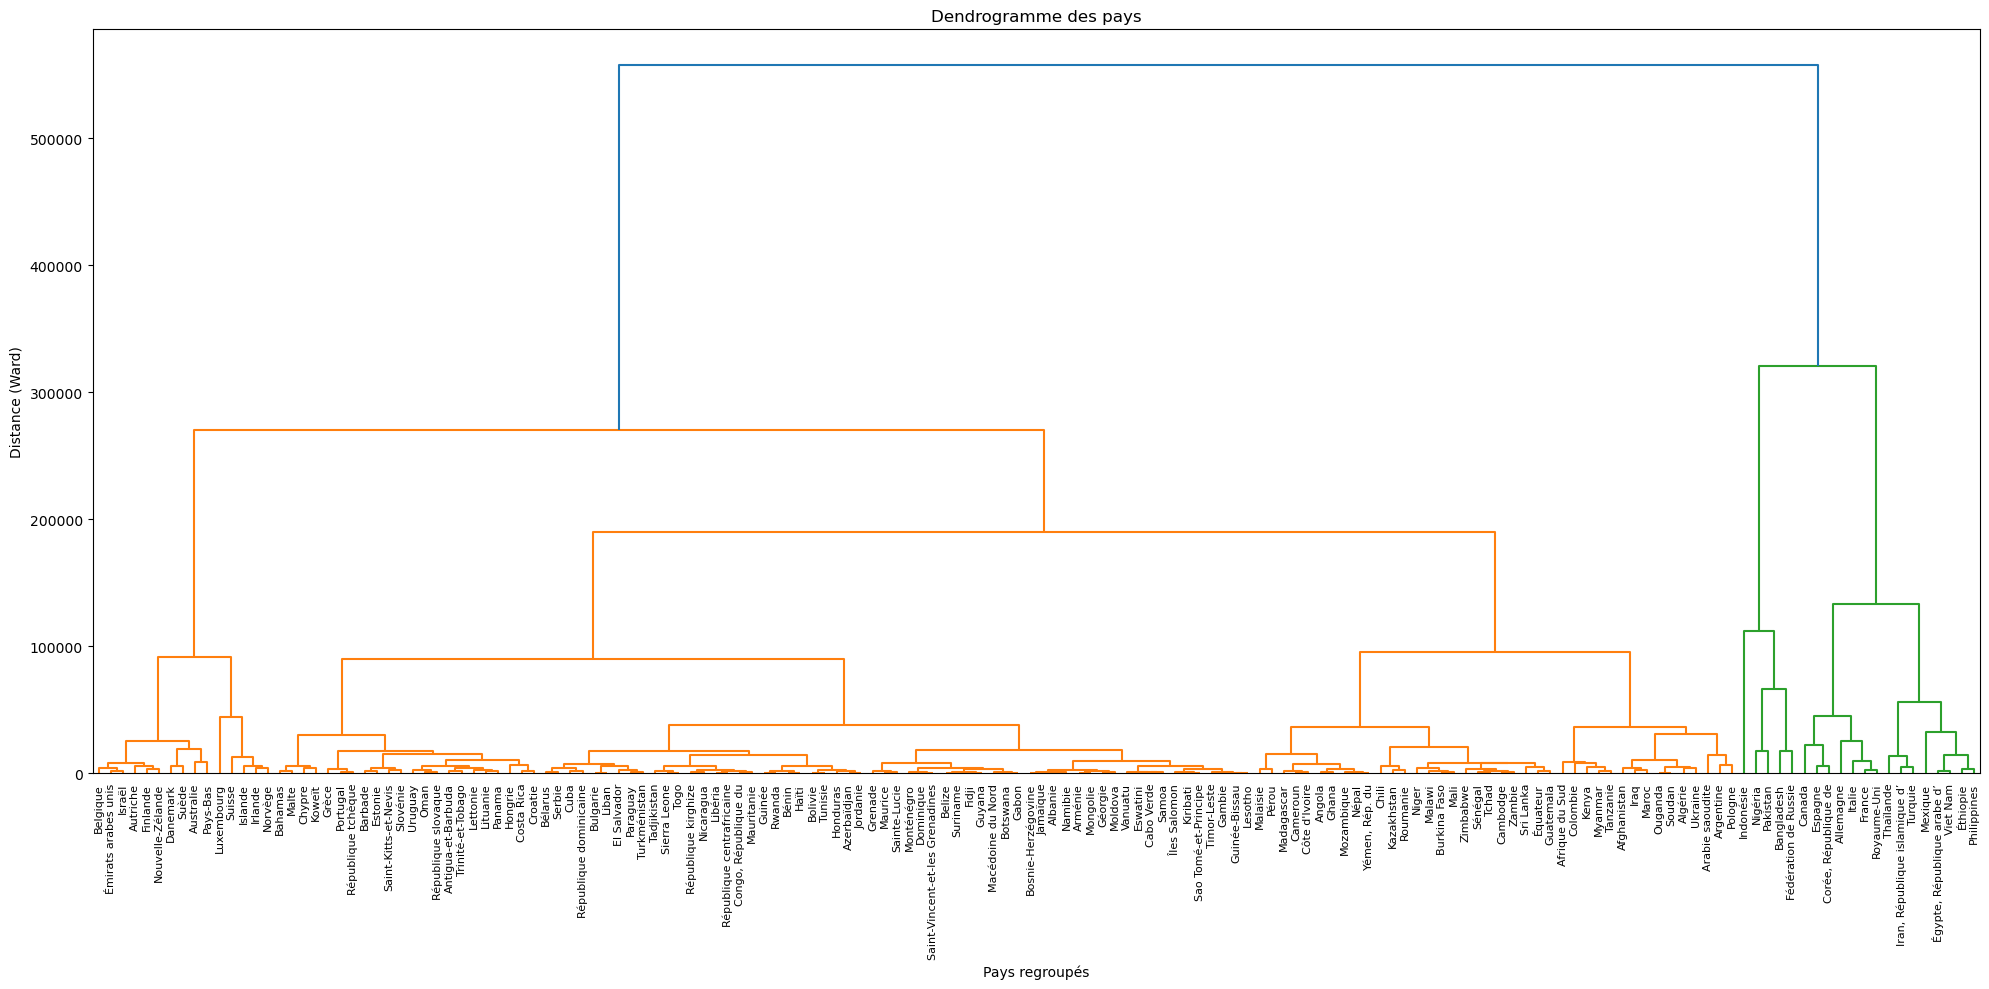

In [46]:
# préparation des données pour le clustering
X = df_sans_outliers.values
names = df_sans_outliers.index  # noms des pays en index

# Étape 1 : calcul des liaisons hiérarchiques avec la méthode de Ward
Z = linkage(X, method='ward')  # on part du df standardisé ou normalisé selon ton flux

# Étape 2 : génération du dendrogramme
plt.figure(figsize=(20, 10))
dendrogram(Z,
           labels=names,          # 👉 affiche les noms des pays
           leaf_rotation=90,      # rotation des étiquettes
           leaf_font_size=8,      # taille de la police
           color_threshold=None)  

plt.title("Dendrogramme des pays")
plt.xlabel("Pays regroupés")
plt.ylabel("Distance (Ward)")
plt.tight_layout()
plt.show()

🔍 Mon analyse du dendrogramme

Ce dendrogramme me permet d’avoir une vue d’ensemble sur la manière dont les pays se regroupent en fonction de leurs caractéristiques communes (production, consommation de volaille, stabilité politique, population, etc.), après réduction des dimensions via l’ACP.

J’ai utilisé la méthode de Ward, qui permet de minimiser la variance intra-groupe à chaque fusion. En observant la hauteur des branches, je note qu’il existe plusieurs niveaux possibles pour « couper » l’arbre, mais une coupure aux alentours de 3 ou 4 grands groupes semble pertinente.

Cela me laisse penser qu’il existe 3 à 4 grands profils types de pays dans mon jeu de données :
	•	Certains très producteurs/exportateurs,
	•	D’autres plus consommateurs ou importateurs,
	•	Et peut-être un groupe marqué par une forte instabilité ou des spécificités géographiques ou démographiques.

Cette visualisation m’aide à préparer l’étape suivante, le clustering par K-means, en affinant le nombre de clusters à tester (je commencerai logiquement par 3 ou 4).

In [48]:
# Découpe du dendrogramme en 5 clusters
clusters = fcluster(Z, 5, criterion='maxclust')
# Création d'un df avec une colonne cluster et une colonne zone
groupes = pd.DataFrame({"cluster": clusters, "Pays": names})
print(groupes)

     cluster            Pays
0          3     Afghanistan
1          3  Afrique du Sud
2          2         Albanie
3          3         Algérie
4          5       Allemagne
..       ...             ...
151        2         Vanuatu
152        5        Viet Nam
153        3  Yémen, Rép. du
154        3          Zambie
155        3        Zimbabwe

[156 rows x 2 columns]


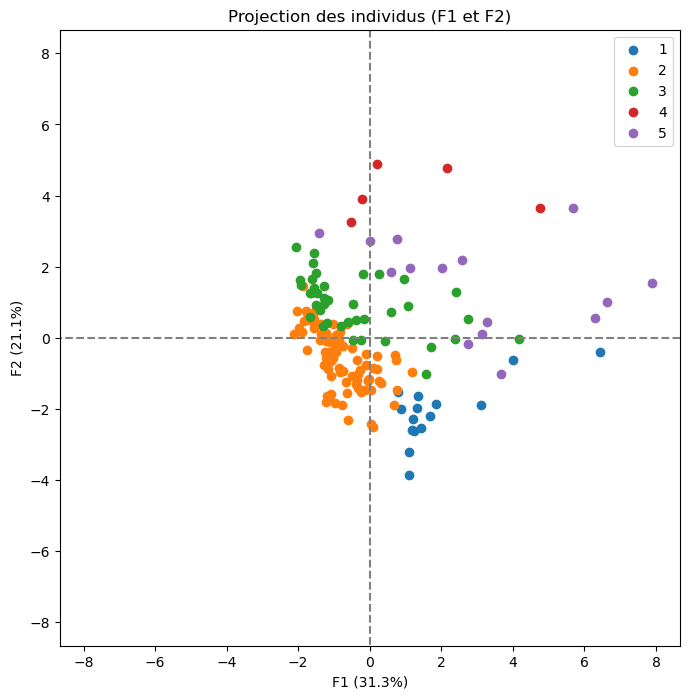

In [49]:
# Projection des individus sur F1 et F2
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels=None, illustrative_var=clusters)
plt.show()

In [50]:
# Je tri les pays par cluster
groupes.sort_values(by=['cluster']).head()

,cluster,Pays
105,1,Nouvelle-Zélande
136,1,Suède
84,1,Luxembourg
11,1,Autriche
10,1,Australie


In [51]:
# Affichage du nombre de pays par cluster
groupes['cluster'].value_counts()

cluster
2    81
3    40
5    15
1    15
4     5
Name: count, dtype: int64

In [52]:
df_sans_outliers.head()

,conso_volaille_kg_hab,import_volaille_milliers_tonnes,export_volaille_milliers_tonnes,dispo_volaille_milliers_tonnes,variation_stock_milliers_tonnes,Population_milliers,PIB_hab_USD,Population_urbaine_%,Stabilite_politique,PIB_total_milliards_USD,autosuffisance_volaille
Pays,,,,,,,,,,,
Afghanistan,1.53,29.0,0.0,57.0,0.0,36296.113,525.469771,25.250,-2.794976,19.072510,0.491228
Afrique du Sud,35.69,514.0,63.0,2118.0,-0.0,57009.756,6618.335083,65.850,-0.284804,377.309668,0.787063
Albanie,16.36,38.0,0.0,47.0,4.0,2884.169,4614.047969,59.383,0.373771,13.307694,0.276596
Algérie,6.38,2.0,0.0,277.0,0.0,41389.189,4554.667540,72.052,-0.919614,188.513996,0.992780
Allemagne,19.47,842.0,646.0,1739.0,-29.0,82658.409,45526.599958,77.261,0.574381,3763.156320,0.870615


In [53]:
# Mise à l'échelle des données
df_final_scaled = pd.DataFrame(X_scaled, columns= list(nom_variable), index=df_sans_outliers.index)

In [54]:
groupes.head()

,cluster,Pays
0,3,Afghanistan
1,3,Afrique du Sud
2,2,Albanie
3,3,Algérie
4,5,Allemagne


In [55]:
# Jointure de la colonne cluster dans df_sans_outliers
df_final_clusters = pd.merge(df_final_scaled, groupes, on='Pays')

In [56]:
df_final_clusters.set_index('Pays', inplace = True)

In [57]:
# Calcul de la moyenne des variables pour chaque cluster 
df_final_clusters_moy = df_final_clusters.groupby('cluster').agg(['mean'])

<Figure size 640x480 with 0 Axes>

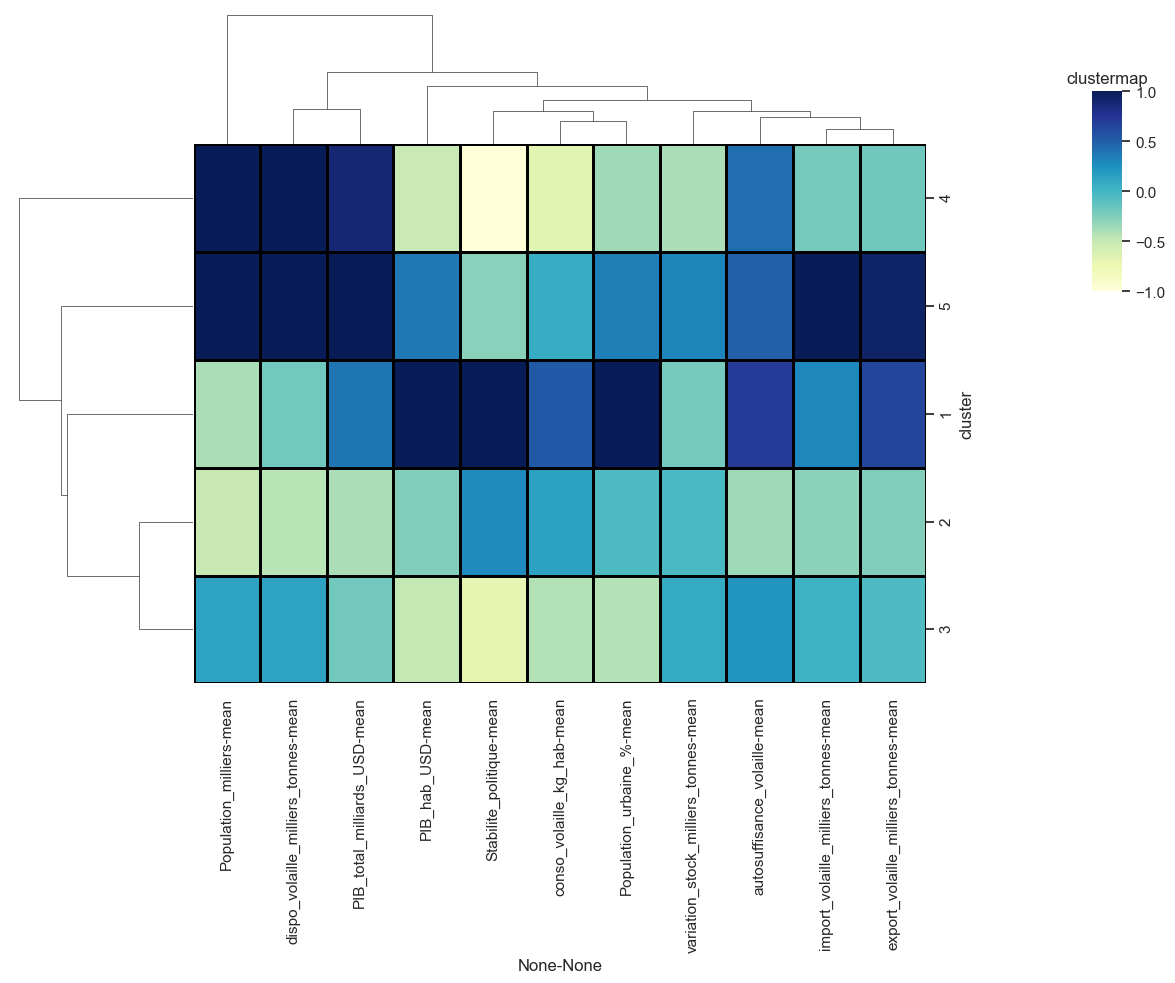

In [58]:
# Création d'une clustermap
plt.figure()
sns.set(rc={'figure.figsize':(13,10)})
sns.clustermap(df_final_clusters_moy,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1,cbar_pos=(1.1, 0.7, .03, .2))
plt.title('clustermap')
plt.show()

## 🌍 Analyse des clusters - Méthode CAH (dendrogramme + clustermap)

La **clustermap** ci-dessous est issue de la classification hiérarchique ascendante (CAH) appliquée sur nos données standardisées.  
Elle permet de visualiser **5 clusters** distincts à partir des variables normalisées.

> 🔵 **Bleu foncé** = valeur élevée  
> 🟡 **Jaune clair** = valeur faible

### 🔎 Lecture et interprétation des clusters

#### 🟦 Cluster 1 — Pays fortement développés et dynamiques

- Population élevée
- Forte production, importation, exportation de volaille
- Disponibilité intérieure importante
- Consommation/habitant élevée
- PIB/habitant élevé

➡️ **Cluster cible privilégié** pour un développement à l’international dans des zones à fort volume et fort pouvoir d’achat.  
Pays potentiels : 🇫🇷 🇩🇪 🇺🇸 🇧🇷 (à vérifier précisément dans les données)

---

#### 🟨 Cluster 2 — Petits pays stables et urbanisés

- PIB/hab élevé
- Urbanisation élevée
- Stabilité politique bonne
- Faible population totale
- Faibles volumes de volaille (prod/conso/import/export)

➡️ Intéressant pour des **marchés de niche solvables**, à faible volume mais peu concurrentiels.

---

#### ⚖️ Cluster 3 — Pays “moyens”

- Pas de caractéristiques très marquées
- Variables proches de la moyenne globale

➡️ Groupe homogène, peu discriminant. Peut représenter un **marché stable ou en attente de développement**.

---

#### 🟩 Cluster 4 — Pays autosuffisants, peu ouverts

- Production locale et consommation importantes
- Variation de stock importante
- Très peu d'import/export
- PIB/hab et urbanisation faibles

➡️ Peu d'intérêt pour une stratégie d'export : **marchés fermés**, auto-consommation forte.

---

#### 🔄 Cluster 5 — Pays exportateurs nets, mais instables

- Forte production et exportation
- Faible stabilité politique
- PIB/hab et urbanisation faibles

➡️ Potentiel pour s’approvisionner à bas coût, mais avec **risques logistiques/politiques à prendre en compte**.

---

### 🎯 Conclusion : Cluster Cible Recommandé

Pour "La Poule qui Chante", le **Cluster 1** apparaît comme le **plus pertinent** :

- Fort pouvoir d’achat
- Consommation de volaille déjà importante
- Capacité d’importation/exportation développée
- Stabilité globale

👉 Prochaine étape possible : **liste détaillée des pays du cluster 1** pour les analyser plus finement.

In [60]:
## Affichage des pays du cluster 1

cluster_1 = df_final_clusters.loc[df_final_clusters['cluster']==1]



cluster_1.head(68)

,conso_volaille_kg_hab,import_volaille_milliers_tonnes,export_volaille_milliers_tonnes,dispo_volaille_milliers_tonnes,variation_stock_milliers_tonnes,Population_milliers,PIB_hab_USD,Population_urbaine_%,Stabilite_politique,PIB_total_milliards_USD,autosuffisance_volaille,cluster
Pays,,,,,,,,,,,,
Australie,1.814189,-0.394706,-0.081046,1.072945,1.671258,0.002229,2.182372,1.290681,1.067786,2.062784,0.610194,1
Autriche,-0.101110,0.188641,0.119994,-0.318352,-0.048650,-0.392624,1.819474,0.012631,1.238696,0.331797,0.144866,1
Belgique,-0.462057,1.603567,3.347796,-0.347628,-0.430852,-0.327506,1.650982,1.844778,0.557533,0.497233,4.611730,1
Danemark,0.599974,0.331375,0.460644,-0.326716,-0.267051,-0.469958,2.377331,1.375838,1.044273,0.167584,0.512802,1
Émirats arabes unis,1.542340,2.193120,0.209345,0.014834,-0.976854,-0.375910,1.559706,1.306490,0.762702,0.304598,-1.362032,1
Finlande,-0.064690,-0.394706,-0.248579,-0.404785,0.333552,-0.475491,1.761376,1.264072,1.276742,0.023386,0.770211,1
Irlande,0.394462,0.120377,0.203760,-0.381086,-0.594653,-0.494479,3.167790,0.235658,1.198390,0.193189,0.152785,1
Islande,0.663059,-0.481587,-0.315592,-0.545588,-0.239751,-0.605157,3.157667,1.652312,1.581563,-0.414346,0.439540,1
Israël,3.097991,-0.493999,-0.298839,0.327110,-0.540052,-0.407052,1.494962,1.586273,-0.903269,0.185500,0.417096,1


## 🇪🇺 Analyse du Cluster 1 – Pays développés et solvables

Ce cluster regroupe principalement des **pays à haut revenu**, disposant d’un **marché de la volaille mature**, avec un haut niveau de vie et une forte capacité d’import/export.

### 🌍 Pays du cluster

Australie, Autriche, Belgique, Danemark, Émirats arabes unis, Finlande, Irlande, Islande, Israël, Luxembourg, Norvège, Nouvelle-Zélande, Pays-Bas, Suède, Suisse.

Ces pays partagent plusieurs caractéristiques économiques et structurelles :
- Haut **PIB par habitant**
- Taux d’**urbanisation élevé**
- **Stabilité politique** importante
- Consommation de volaille **modérément supérieure à la moyenne mondiale**
- **Production** locale souvent significative, mais compensée par des **échanges commerciaux importants** (import/export)

---

### 📊 Lecture des indicateurs standardisés

| Variable | Niveau moyen observé | Interprétation |
|-----------|----------------------|----------------|
| **PIB_hab_USD** | 🔵 Élevé | Pouvoir d’achat important |
| **Population_urbaine_%** | 🔵 Élevé | Forte urbanisation, marché structuré |
| **Stabilité politique** | 🔵 Élevée | Contexte favorable aux échanges |
| **Conso_volaille_kg_hab** | 🟢 Légèrement au-dessus de la moyenne | Marché mature, mais stable |
| **Import/Export volaille** | 🔵 Positif | Marché ouvert et interconnecté |
| **Disponibilité intérieure** | 🟢 Moyenne à forte | Bonne couverture du marché local |
| **Variation de stock** | ⚪ Neutre | Pas de tension d’approvisionnement marquée |

---

### 🎯 Interprétation stratégique

Le **Cluster 1** représente les **marchés cibles prioritaires** pour un développement à l’international :

- Capacité à importer des produits à forte valeur ajoutée (volaille bio, labels qualité, produits différenciés)
- Logistique et infrastructures solides
- Risques politiques et économiques faibles
- Consommateurs sensibles à la qualité, au bien-être animal et à l’origine des produits

> 💡 Ces pays constituent la **zone la plus porteuse pour “La Poule qui Chante”**, avec une orientation export haut de gamme et différenciée.

---

### 🔍 Piste d’approfondissement
Une analyse complémentaire pourrait consister à :
- cartographier ces pays pour visualiser la concentration géographique du cluster,  
- comparer les volumes moyens de production et d’importation,  
- identifier les sous-groupes (Europe vs Océanie vs Moyen-Orient) pour adapter les stratégies commerciales.

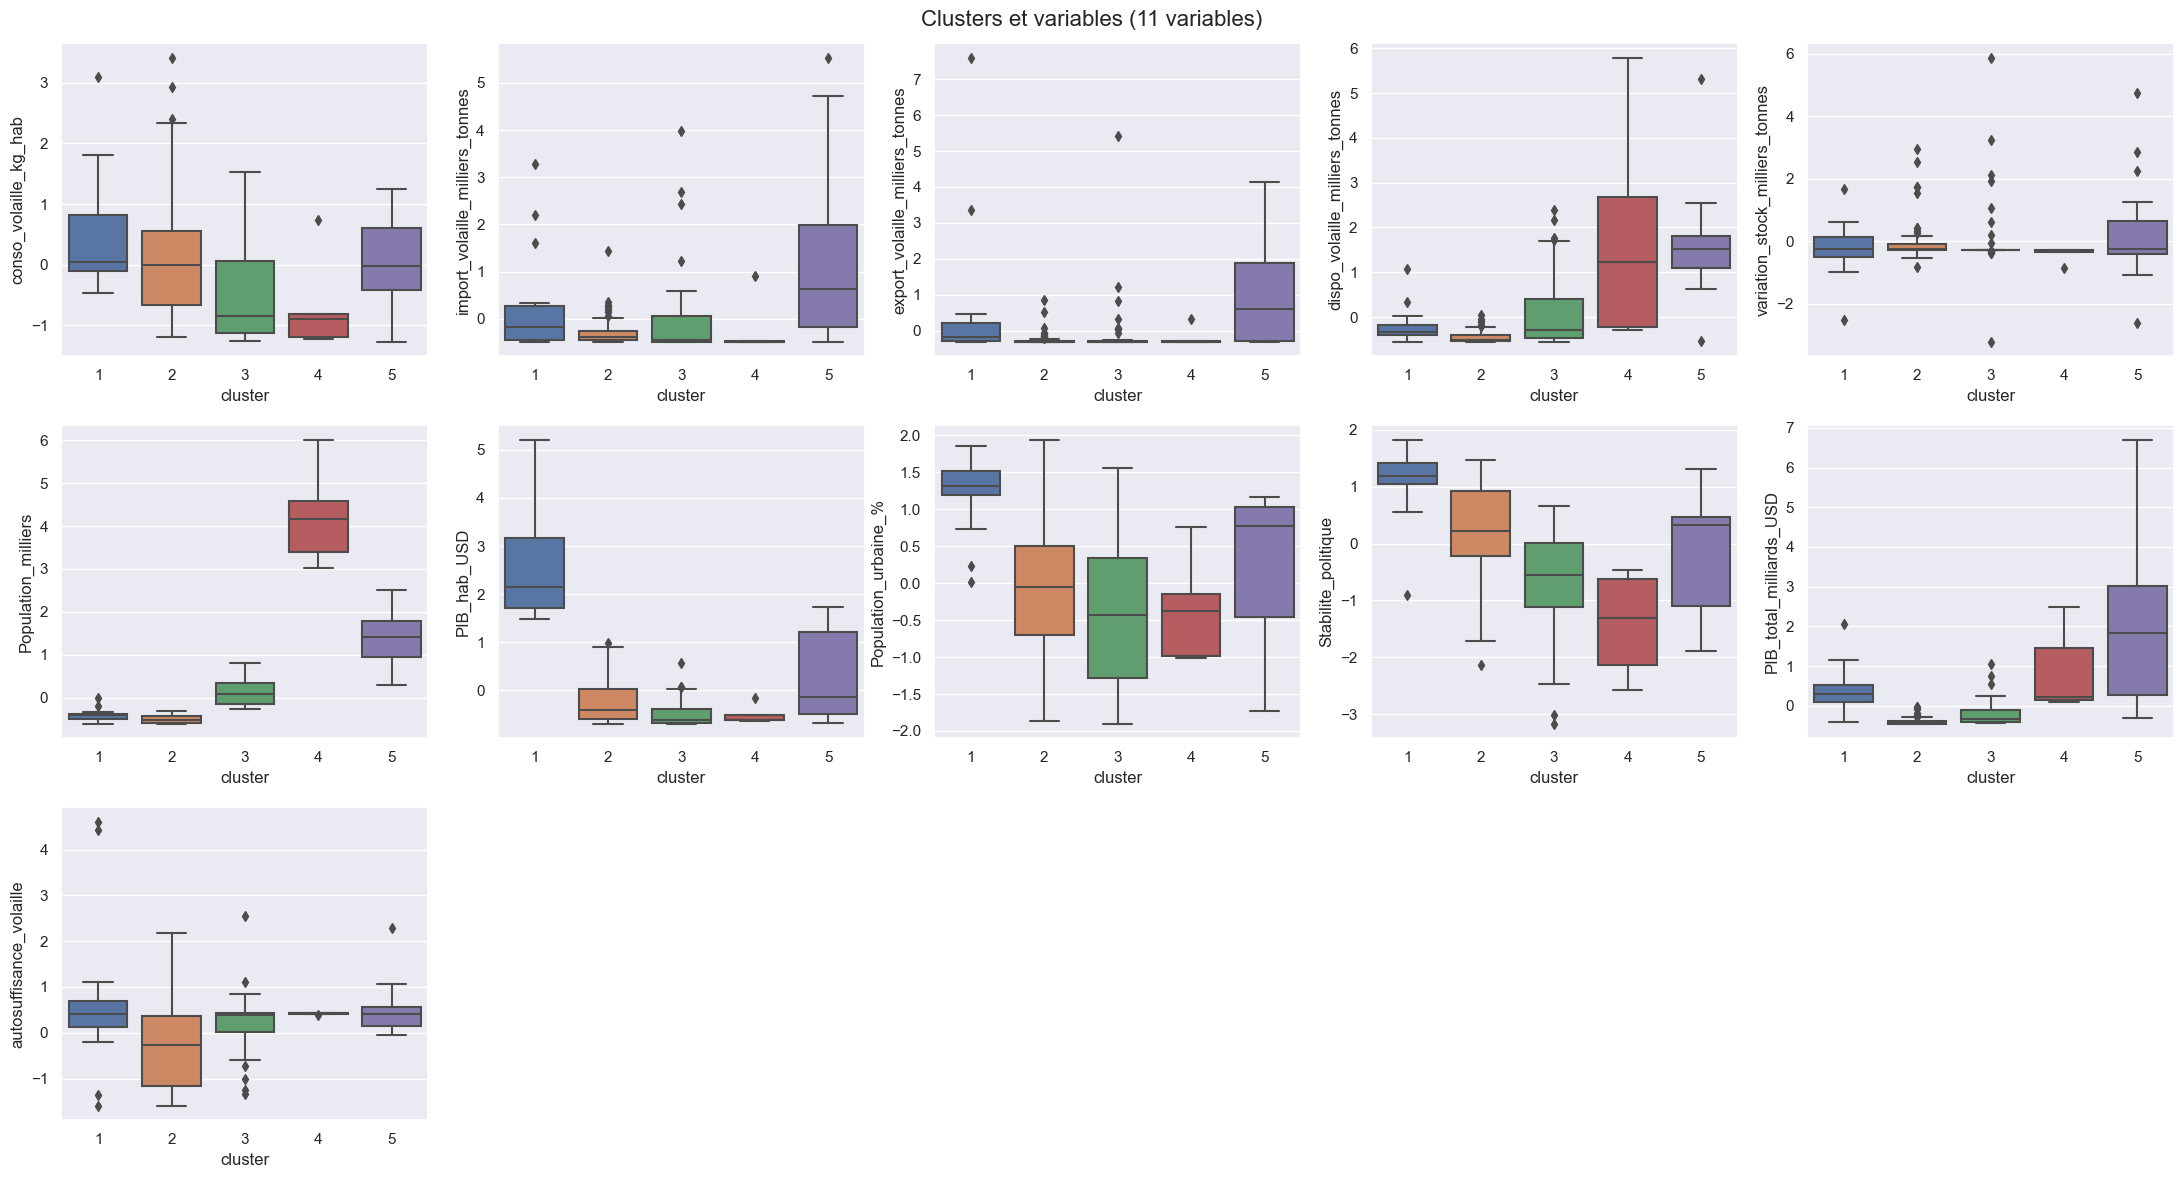

In [62]:
# Création de boxplots pour les 11 variables
fig, axes = plt.subplots(3, 5, figsize=(22, 12))
fig.suptitle('Clusters et variables (11 variables)', fontsize=16)

sns.boxplot(ax=axes[0, 0], data=df_final_clusters, x='cluster', y='conso_volaille_kg_hab')
sns.boxplot(ax=axes[0, 1], data=df_final_clusters, x='cluster', y='import_volaille_milliers_tonnes')
sns.boxplot(ax=axes[0, 2], data=df_final_clusters, x='cluster', y='export_volaille_milliers_tonnes')
sns.boxplot(ax=axes[0, 3], data=df_final_clusters, x='cluster', y='dispo_volaille_milliers_tonnes')
sns.boxplot(ax=axes[0, 4], data=df_final_clusters, x='cluster', y='variation_stock_milliers_tonnes')

sns.boxplot(ax=axes[1, 0], data=df_final_clusters, x='cluster', y='Population_milliers')
sns.boxplot(ax=axes[1, 1], data=df_final_clusters, x='cluster', y='PIB_hab_USD')
sns.boxplot(ax=axes[1, 2], data=df_final_clusters, x='cluster', y='Population_urbaine_%')
sns.boxplot(ax=axes[1, 3], data=df_final_clusters, x='cluster', y='Stabilite_politique')
sns.boxplot(ax=axes[1, 4], data=df_final_clusters, x='cluster', y='PIB_total_milliards_USD')

sns.boxplot(ax=axes[2, 0], data=df_final_clusters, x='cluster', y='autosuffisance_volaille')


# Masquer les 4 cases restantes vides
axes[2, 1].axis('off')
axes[2, 2].axis('off')
axes[2, 3].axis('off')
axes[2, 4].axis('off')

plt.tight_layout()
plt.show()

## 📊 Analyse comparative des variables par cluster (Boxplots)

Ces boxplots présentent la distribution des 11 variables clés pour chacun des 5 clusters identifiés.

Chaque graphique permet de visualiser les **écarts de comportement** entre les groupes de pays.  
Les valeurs sont **standardisées (centrées-réduites)** :  
> - 0 = moyenne mondiale  
> - positif = au-dessus de la moyenne  
> - négatif = en dessous de la moyenne

---

### 🔹 Principaux enseignements

#### 🟦 Cluster 1 – Pays développés et solvables
- PIB/habitant et urbanisation très élevés  
- Stabilité politique importante  
- Import/export positifs  
➡️ **Marché cible prioritaire** pour une stratégie d’export à forte valeur ajoutée.

#### 🟨 Cluster 2 – Petits marchés solvables
- PIB/hab élevé mais faible population  
- Faibles flux commerciaux  
➡️ **Opportunités de niche** pour produits différenciés.

#### 🟢 Cluster 3 – Profil moyen
- Ensemble des variables proches de la moyenne  
➡️ Marchés “neutres”, peu discriminants.

#### 🟣 Cluster 4 – Marchés autosuffisants
- Production et disponibilité élevées  
- Peu ouverts au commerce international  
➡️ Marchés **peu attractifs pour l’export**.

#### 🟤 Cluster 5 – Grands producteurs/exportateurs à bas coût
- Forte production et exportations  
- PIB/hab faible et stabilité politique moyenne à basse  
➡️ **Intéressant en sourcing**, mais non prioritaire pour la vente.

---

### 🎯 Conclusion
Ces boxplots confirment les tendances observées dans la clustermap :
- Le **cluster 1** regroupe les pays les plus développés, solvables et ouverts au commerce.  
- Les **clusters 4 et 5** sont plus tournés vers l’autosuffisance ou l’export low-cost.  
- Les **clusters 2 et 3** occupent des positions intermédiaires.

> 💡 Cette étape valide la **robustesse du découpage en 5 clusters** et renforce la pertinence du cluster 1 comme **marché cible stratégique**.

## K Means

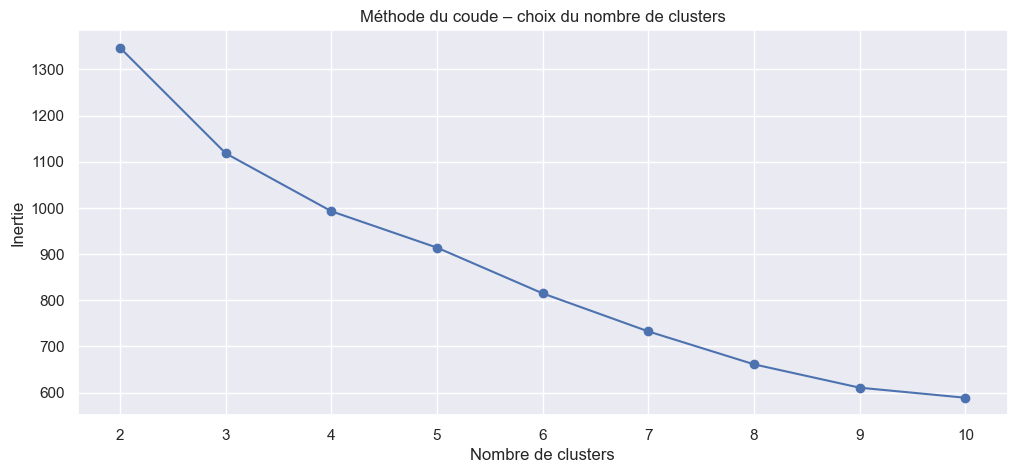

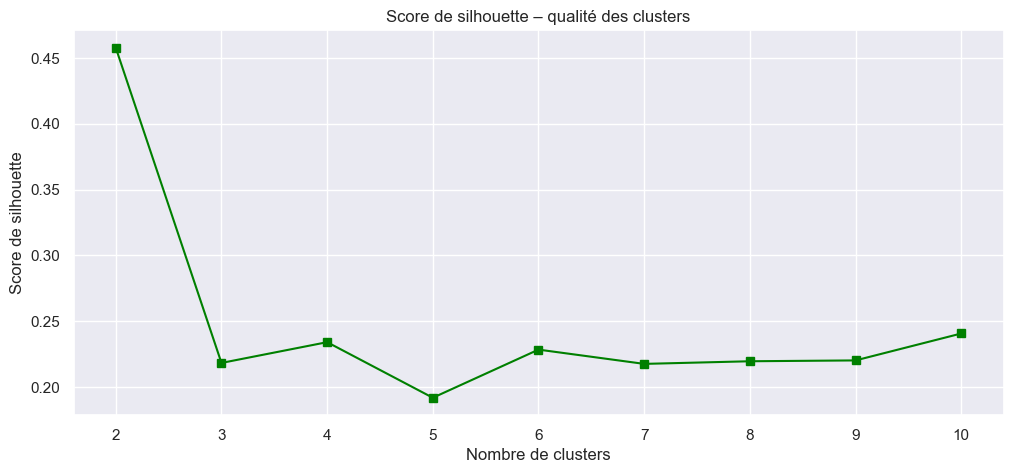

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Étape 1 : Choix du nombre optimal de clusters avec la méthode du coude
inertias = []
silhouette_scores = []
K_range = range(2, 11)  # On teste de 2 à 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)  # X_pca = données projetées sur l’ACP (déjà calculé)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Affichage de la courbe du coude
plt.figure(figsize=(12, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Méthode du coude – choix du nombre de clusters")
plt.grid(True)
plt.show()

# Affichage des scores de silhouette
plt.figure(figsize=(12, 5))
plt.plot(K_range, silhouette_scores, marker='s', color='green')
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")
plt.title("Score de silhouette – qualité des clusters")
plt.grid(True)
plt.show()

In [66]:
#Création d'une PCA pour projeter les données et observer les clusters avec le module decomposition
Y = X_scaled
pca = decomposition.PCA(n_components=10).fit(Y)
Y_projected = pca.transform(Y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


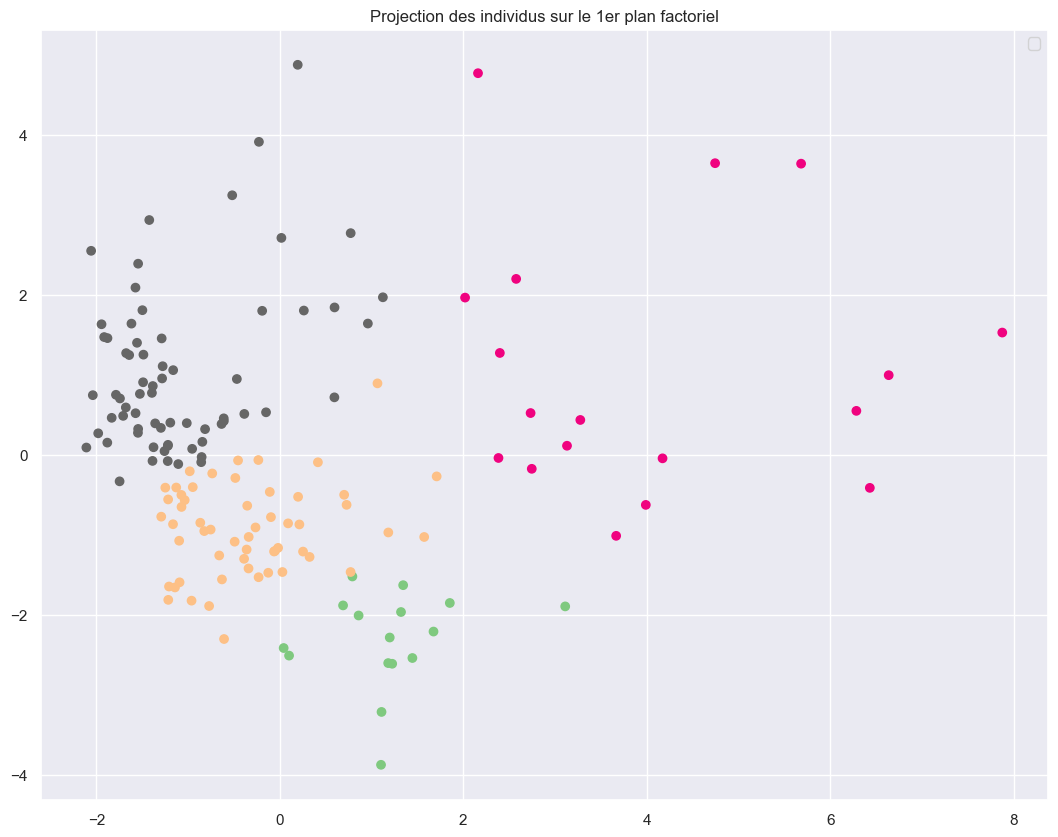

In [67]:
# Clustering par K-means
km = KMeans(n_clusters=4, random_state=3, n_init='auto')
km.fit(Y)
# Récupération des clusters attribués à chaque individu
clusters = km.labels_
# Affichage du clustering par projection des individus sur le premier plan factoriel
plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=km.labels_,cmap='Accent')
plt.title("Projection des individus sur le 1er plan factoriel")
plt.legend()
plt.show()

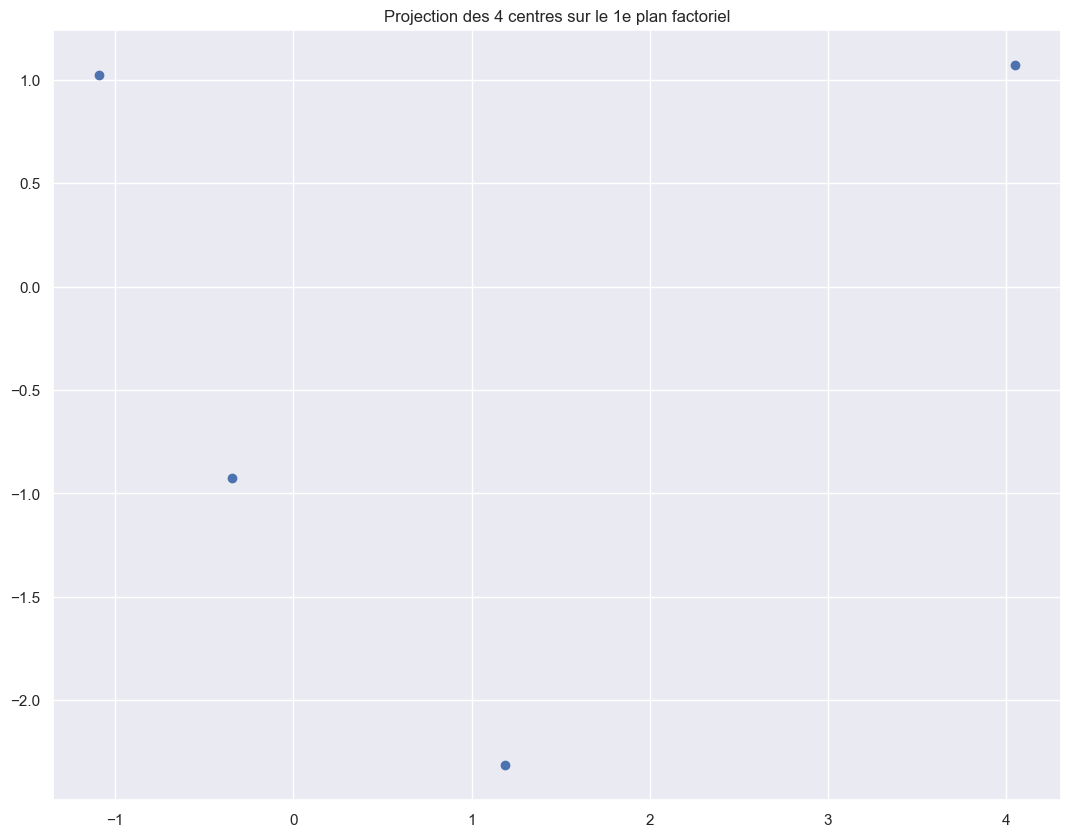

In [68]:
# Affichage des positions des centres de classes
plt.figure()
centroids1 = km.cluster_centers_
centroids_projected1 = pca.transform(centroids1)
plt.scatter(centroids_projected1[:,0],centroids_projected1[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids1)))
plt.show()

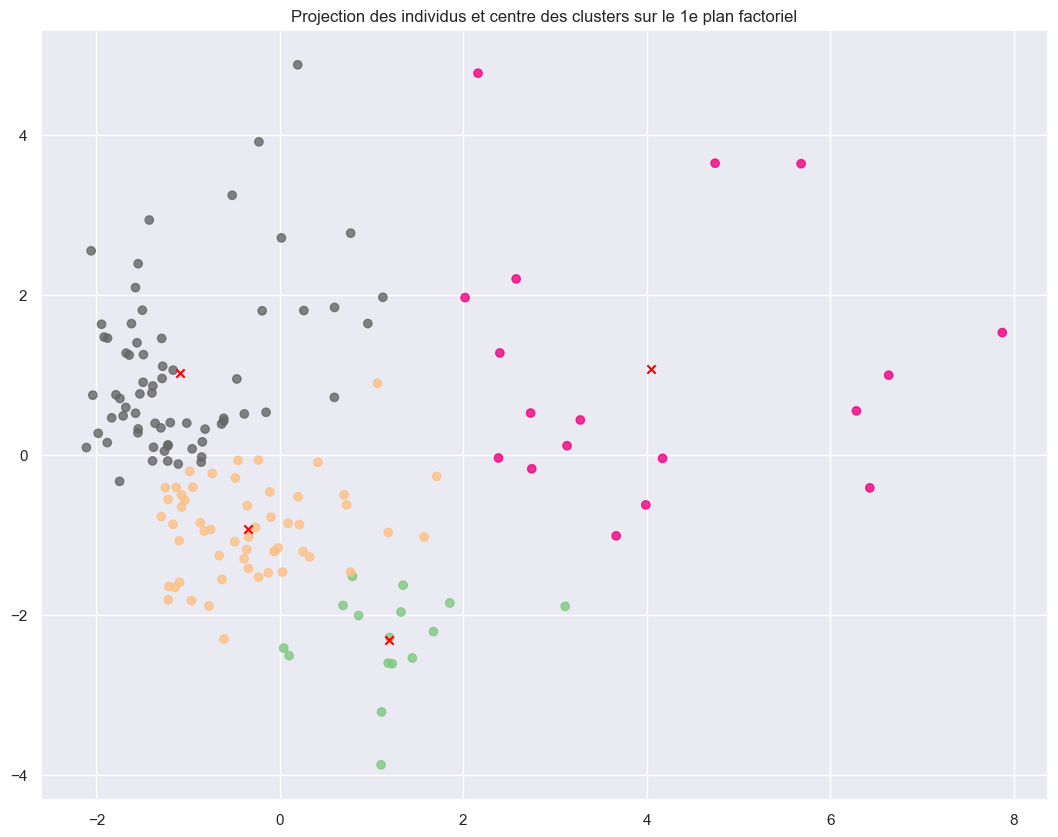

In [69]:
# Création d'un graphique avec la projection des individus et des centres des clusters
plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=clusters.astype(float),cmap='Accent', alpha=.8)
plt.scatter(centroids_projected1[:,0],centroids_projected1[:,1], c='red', marker='x')
plt.title("Projection des individus et centre des clusters sur le 1e plan factoriel".format(len(centroids1)))
plt.show()

Visualisation des clusters et de leurs centres (PCA + K-Means)

Ce graphique représente la projection des pays sur le plan factoriel (ACP) après l’application de l’algorithme K-Means.
Chaque point correspond à un pays, positionné selon ses coordonnées sur les deux premières composantes principales de l’ACP.
	•	Les couleurs distinguent les différents clusters identifiés par le K-Means.
	•	Les croix rouges représentent les centroïdes (points moyens) de chaque cluster, calculés automatiquement par l’algorithme.
	•	Les axes factoriels (Composante 1 et Composante 2) concentrent la majorité de la variance du jeu de données, permettant une visualisation synthétique des groupes.

Cette visualisation permet :
	•	d’évaluer la séparation visuelle des clusters : plus les groupes sont éloignés, plus leur profil est distinct ;
	•	d’identifier les zones de proximité entre clusters, révélant d’éventuelles similitudes structurelles ;
	•	de repérer les pays atypiques ou excentrés, susceptibles d’être analysés séparément (outliers).

👉 On constate ici quatre groupes bien distincts, avec des centres (croix rouges) positionnés au cœur de chaque regroupement, confirmant la cohérence du découpage obtenu par le K-Means.

In [71]:
#mise à l'échelle des données
df_final_k_scaled1 = pd.DataFrame(X_scaled, columns= list(nom_variable), index=df_sans_outliers.index)

In [72]:
# Regroupement des clusters par pays
clusters = km.labels_
df_clusters1 = pd.DataFrame(index=[df_sans_outliers.index])
df_clusters1['Clusters'] = clusters
df_clusters1 = df_clusters1.reset_index()
df_clusters1.head()

,Pays,Clusters
0,Afghanistan,3
1,Afrique du Sud,2
2,Albanie,1
3,Algérie,3
4,Allemagne,2


In [73]:
# Jointure de mes fichiers
df_final_k1 = pd.merge(df_final_k_scaled1,df_clusters1, on='Pays')

In [74]:
df_final_k1 = df_final_k1.sort_values('Clusters')

In [75]:
df_final_k1.set_index('Pays', inplace = True)



In [76]:
df_final_k_moy1 = df_final_k1.groupby('Clusters').agg(['mean'])



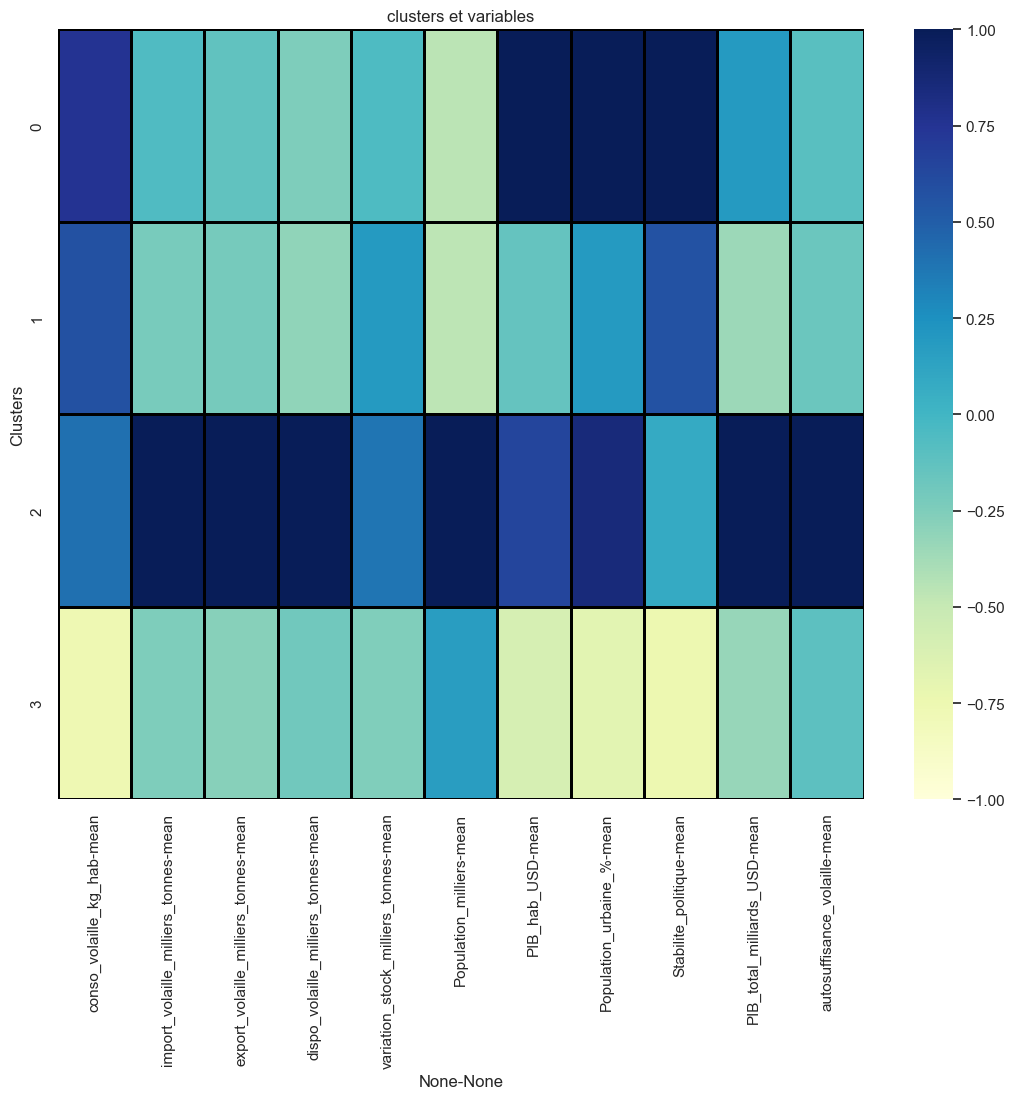

In [77]:
plt.figure()
sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(df_final_k_moy1,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1 )
plt.title('clusters et variables')
plt.show()

## 🧩 Étape 7 – Interprétation des clusters et choix du cluster cible (objectif : export bio)

L’analyse de la matrice de chaleur issue du modèle K-Means met en évidence **quatre profils distincts de pays**, différenciés selon leurs niveaux de développement économique, de production et d’ouverture commerciale.

La lecture du graphique repose sur le code couleur suivant :  
- 🔵 **Bleu foncé : valeur élevée** (score standardisé proche de +1)  
- 🟡 **Couleur claire : valeur faible** (score standardisé proche de −1)

---

### 🟦 Cluster 2 – Économies développées et marchés matures  
Ce cluster regroupe les **pays à fort PIB par habitant**, caractérisés par une **population urbaine importante**, une **stabilité politique élevée**, et surtout des **importations significatives de volaille**.  
Les **niveaux de production et de consommation** y sont également élevés, traduisant des marchés structurés et dynamiques.  

Ces pays disposent d’une **forte demande pour des produits différenciés**, tels que la volaille **biologique, locale ou labellisée**.  
Leur pouvoir d’achat élevé et leurs standards de qualité en font des **marchés premium**, où la concurrence est forte mais où la niche du bio peut offrir de réelles opportunités.  

→ **Profil :** économies avancées (Europe de l’Ouest, Amérique du Nord, Asie développée).  
→ **Intérêt stratégique :** **cluster cible prioritaire pour l’export de volaille bio.**

---

### 🟩 Cluster 1 – Économies émergentes en structuration  
Les pays de ce groupe présentent des **valeurs intermédiaires à élevées** sur la production, la disponibilité alimentaire et la consommation.  
Le **PIB/habitant** et la **stabilité politique** restent moyens, mais la **filière avicole y est en pleine croissance**.  

Il s’agit de **marchés en développement**, où la demande progresse rapidement avec l’urbanisation et l’essor des classes moyennes.  
Même si la part du bio reste encore marginale, ces pays pourraient devenir des **marchés relais à moyen terme**, notamment via des accords de distribution ou des coopérations techniques.

→ **Profil :** économies en transition, avec une dynamique de structuration du marché avicole.  
→ **Intérêt stratégique :** marchés à surveiller pour un **déploiement progressif du bio**.

---

### 🟩 Cluster 0 – Économies intermédiaires et marchés stables  
Ce cluster présente des **niveaux moyens sur la plupart des variables**, avec une **consommation par habitant soutenue**, un **PIB/habitant modéré** et une **urbanisation importante**.  
Les importations sont présentes mais moins marquées que dans le cluster 2.  

Il s’agit de **marchés matures mais sensibles au prix**, où le bio peut exister sous forme de **labels “naturels” ou “locaux”** plutôt qu’en certification stricte.  
Ces pays peuvent représenter un **segment complémentaire**, mais pas le cœur de la stratégie d’exportation.

→ **Profil :** économies intermédiaires, souvent stables et à pouvoir d’achat moyen.  
→ **Intérêt stratégique :** marchés secondaires, pour produits différenciés non premium.

---

### 🟨 Cluster 3 – Économies fragiles à faible développement  
Les pays de ce cluster présentent des **niveaux faibles sur toutes les variables économiques** : PIB/habitant bas, urbanisation limitée, stabilité réduite et production modeste.  
La consommation et les échanges de volaille restent très faibles.  

→ **Profil :** pays à bas revenus, parfois en transition politique.  
→ **Intérêt stratégique :** marchés non prioritaires pour le bio, sauf dans une optique de **coopération ou d’aide au développement**.

---

### 🎯 Synthèse et choix du cluster cible (objectif : export bio)

| Cluster | Profil principal | Niveau de développement | Intérêt pour l’export bio |
|:--:|:--|:--|:--|
| 2 | Économies développées et matures | Élevé | **Cible prioritaire : marchés premium solvables** |
| 1 | Émergents en structuration | Intermédiaire | Potentiel à moyen terme |
| 0 | Intermédiaires stables | Moyen | Marchés secondaires sensibles au prix |
| 3 | Économies fragiles | Faible | Hors cible commerciale |

En conclusion, le **Cluster 2** regroupe les pays les plus favorables à une **stratégie d’exportation de volaille biologique**.  
Leur **pouvoir d’achat élevé**, leur **fort taux d’importation** et leur **maturité commerciale** en font les marchés les plus propices à une offre haut de gamme, différenciée et durable.  
Les **Clusters 1 et 0** peuvent être considérés comme des **axes de diversification**, avec un potentiel de développement progressif du bio à moyen terme.

In [88]:
cluster_K_1 = df_final_k1.loc[df_final_k1['Clusters']==2]



cluster_K_1.head(68)

,conso_volaille_kg_hab,import_volaille_milliers_tonnes,export_volaille_milliers_tonnes,dispo_volaille_milliers_tonnes,variation_stock_milliers_tonnes,Population_milliers,PIB_hab_USD,Population_urbaine_%,Stabilite_politique,PIB_total_milliards_USD,autosuffisance_volaille,Clusters
Pays,,,,,,,,,,,,
Royaume-Uni,0.792480,4.340333,1.689219,2.554858,-0.267051,1.057763,1.467535,1.163795,0.516434,4.701479,0.056174,2
Belgique,-0.462057,1.603567,3.347796,-0.347628,-0.430852,-0.327506,1.650982,1.844778,0.557533,0.497233,4.611730,2
Espagne,0.691674,0.778194,0.868308,1.527417,0.033250,0.554827,0.807881,1.023030,0.394190,2.060430,0.464058,2
France,0.204558,2.646145,2.482209,1.633367,4.728872,1.010551,1.362938,1.027626,0.388464,4.315912,0.668992,2
Mexique,0.830200,5.538056,-0.265332,5.322117,-0.430852,2.511713,-0.201002,1.013242,-0.804786,1.832140,-0.029284,2
Arabie saoudite,1.535186,3.986601,-0.259748,1.440984,-3.215465,0.215539,0.568099,1.185808,-0.630277,1.047874,-0.724263,2
"Corée, République de",-0.198663,0.356198,-0.282085,0.631020,2.872463,0.666258,0.981273,1.088426,0.517714,2.614026,0.401336,2
Allemagne,-0.018514,4.731299,3.291951,1.864786,-1.058755,1.456778,1.731300,0.893479,0.732019,6.704530,0.175706,2
Pologne,0.685821,-0.152679,5.408451,1.052034,5.875477,0.337065,0.028654,0.105049,0.660093,0.545180,2.547476,2


In [94]:
cluster_1.head(20)

,conso_volaille_kg_hab,import_volaille_milliers_tonnes,export_volaille_milliers_tonnes,dispo_volaille_milliers_tonnes,variation_stock_milliers_tonnes,Population_milliers,PIB_hab_USD,Population_urbaine_%,Stabilite_politique,PIB_total_milliards_USD,autosuffisance_volaille,cluster
Pays,,,,,,,,,,,,
Australie,1.814189,-0.394706,-0.081046,1.072945,1.671258,0.002229,2.182372,1.290681,1.067786,2.062784,0.610194,1
Autriche,-0.101110,0.188641,0.119994,-0.318352,-0.048650,-0.392624,1.819474,0.012631,1.238696,0.331797,0.144866,1
Belgique,-0.462057,1.603567,3.347796,-0.347628,-0.430852,-0.327506,1.650982,1.844778,0.557533,0.497233,4.611730,1
Danemark,0.599974,0.331375,0.460644,-0.326716,-0.267051,-0.469958,2.377331,1.375838,1.044273,0.167584,0.512802,1
Émirats arabes unis,1.542340,2.193120,0.209345,0.014834,-0.976854,-0.375910,1.559706,1.306490,0.762702,0.304598,-1.362032,1
Finlande,-0.064690,-0.394706,-0.248579,-0.404785,0.333552,-0.475491,1.761376,1.264072,1.276742,0.023386,0.770211,1
Irlande,0.394462,0.120377,0.203760,-0.381086,-0.594653,-0.494479,3.167790,0.235658,1.198390,0.193189,0.152785,1
Islande,0.663059,-0.481587,-0.315592,-0.545588,-0.239751,-0.605157,3.157667,1.652312,1.581563,-0.414346,0.439540,1
Israël,3.097991,-0.493999,-0.298839,0.327110,-0.540052,-0.407052,1.494962,1.586273,-0.903269,0.185500,0.417096,1


### 🧩 Différences d’attribution entre la CAH et le K-Means

Lors de la phase de classification, j’ai d’abord utilisé la **CAH (Classification Ascendante Hiérarchique)**, puis le **K-Means** afin de comparer les regroupements obtenus.  
J’ai constaté que certains pays ne se retrouvaient pas exactement dans les mêmes clusters selon la méthode employée.

Ce décalage est tout à fait normal :  
- la **CAH** regroupe les pays en fonction de leur **proximité hiérarchique**, en construisant un arbre de similarité. Le nombre de clusters est défini *a posteriori* en coupant le dendrogramme.  
- le **K-Means**, lui, cherche à créer **k groupes homogènes** autour de centres optimaux, en minimisant la distance moyenne entre les pays et leur centre de cluster. Le nombre de clusters est fixé *a priori*.  

Ces approches ne reposent donc pas sur la même logique :
- la CAH privilégie une **vision structurelle et progressive** des proximités entre pays,
- tandis que le K-Means produit des **groupes plus compacts et équilibrés**, mieux adaptés à une segmentation opérationnelle.

En pratique, j’ai observé que la plupart des grands pays développés restaient regroupés dans les deux méthodes (France, Allemagne, Royaume-Uni, Canada, etc.), mais certains pays “frontières” comme la Pologne, la Turquie ou le Mexique pouvaient changer de groupe selon la méthode.

Ces écarts sont cohérents : ils reflètent simplement des **positions intermédiaires** dans l’espace des variables (PIB, importations, population, etc.).  

👉 Pour la suite de l’analyse et le choix du cluster cible, j’ai retenu la segmentation issue du **K-Means**, plus stable et plus lisible pour une approche stratégique de type “marchés cibles d’exportation”.